# codigo anteriror

In [4]:
import pandas as pd
import inflection
import math
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import datetime

df_sales_raw = pd.read_csv('train.csv', low_memory=False)
df_store_raw = pd.read_csv('store.csv', low_memory=False)
df_raw = pd.merge(df_sales_raw, df_store_raw, how='left', on='Store')

df1 = df_raw.copy()

cols_old = ['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
            'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
            'CompetitionDistance', 'CompetitionOpenSinceMonth',
            'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
            'Promo2SinceYear', 'PromoInterval']

snakecase = lambda x: inflection.underscore(x)
cols_new = list(map(snakecase, cols_old))
df1.columns = cols_new

df1['date'] = pd.to_datetime(df1['date'])

df1['competition_distance'] = df1['competition_distance'].apply(lambda x: 200000.0 if math.isnan(x) else x)
df1['competition_open_since_month'] = df1.apply(lambda x: x['date'].month if math.isnan(x['competition_open_since_month']) else x['competition_open_since_month'], axis=1)
df1['competition_open_since_year'] = df1.apply(lambda x: x['date'].year if math.isnan(x['competition_open_since_year']) else x['competition_open_since_year'], axis=1)
df1['promo2_since_week'] = df1.apply(lambda x: x['date'].week if math.isnan(x['promo2_since_week']) else x['promo2_since_week'], axis=1)
df1['promo2_since_year'] = df1.apply(lambda x: x['date'].year if math.isnan(x['promo2_since_year']) else x['promo2_since_year'], axis=1)

month_map = {1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun', 7:'Jul', 8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'}
df1['promo_interval'] = df1['promo_interval'].fillna(0)
df1['month_map'] = df1['date'].dt.month.map(month_map)
df1['is_promo'] = df1[['promo_interval', 'month_map']].apply(lambda x: 0 if x['promo_interval'] == 0 else 1 if x['month_map'] in x['promo_interval'].split(',') else 0, axis=1)

df1['competition_open_since_month'] = df1['competition_open_since_month'].astype(int)
df1['competition_open_since_year'] = df1['competition_open_since_year'].astype(int)
df1['promo2_since_week'] = df1['promo2_since_week'].astype(int)
df1['promo2_since_year'] = df1['promo2_since_year'].astype(int)

# Verificação dos tipos de dados
df2 = df1.copy()
# year
#dt = data time . (oq eu quero )
df2['year'] = df2['date'].dt.year


#month
df2['month'] = df2['date'].dt.month

#day
df2['day'] = df2['date'].dt.day

#week_of_year
df2['week_of_year'] = df2['date'].dt.isocalendar().week

#Year_week
#ano-semana do ano
df2['year_week'] = df2['date'].dt.strftime('%Y-%W')

# Competition_since
# Quanto tempo a partir da compra até a promoção
# Juntar competition month e year
df2['competition_since'] = df2.apply(lambda x: datetime.datetime(year=x['competition_open_since_year'], month=x['competition_open_since_month'], day=1), axis=1)

# Manter um mês
# Tempo que a competição começou em um mês
df2['competition_time_month'] = ((df2['date'] - df2['competition_since']) / 30).apply(lambda x: x.days).astype(int)


#promo_since
#desde quando tem promoção ativa
#tenho o ano e a semana do ano 
# competition since
df2['competition_since'] = df2.apply( lambda x: datetime.datetime(year=x['competition_open_since_year'],month=x['competition_open_since_month'],day=1 ), axis=1 )
df2['competition_time_month'] = ( ( df2['date'] - df2['competition_since'] )/30).apply( lambda x: x.days ).astype( int )
# promo since
df2['promo_since'] = df2['promo2_since_year'].astype( str ) + '-' + df2['promo2_since_week'].astype( str )
df2['promo_since'] = df2['promo_since'].apply( lambda x: datetime.datetime.strptime( x + '-1', '%Y-%W-%w' ) - datetime.timedelta( days=7 ) )
df2['promo_time_week'] = ( ( df2['date'] - df2['promo_since'] )/7 ).apply(lambda x: x.days ).astype( int )
# assortment
df2['assortment'] = df2['assortment'].apply( lambda x: 'basic' if x == 'a' else 'extra' if x == 'b' else 'extended' )


#state_holiday
#troca a sigla a,b,c por nome
df2['state_holiday'] = df2['state_holiday'].apply( lambda x: 'public_holiday' if x == 'a' else 'easter_holiday' if x == 'b' else 'christmas' if x == 'c' else 'regular_day' )
df3 = df2.copy()
df3
df3 = df3[(df3['open'] != 0) & (df3['sales'] > 0)]
cols_drop = ['customers','open','promo_interval','month_map']
df3 = df3.drop(cols_drop,axis=1)
df3.columns

Index(['store', 'day_of_week', 'date', 'sales', 'promo', 'state_holiday',
       'school_holiday', 'store_type', 'assortment', 'competition_distance',
       'competition_open_since_month', 'competition_open_since_year', 'promo2',
       'promo2_since_week', 'promo2_since_year', 'is_promo', 'year', 'month',
       'day', 'week_of_year', 'year_week', 'competition_since',
       'competition_time_month', 'promo_since', 'promo_time_week'],
      dtype='object')

# Analise de dados exploratório

# countplot


# kdeplot

In [ ]:
como as variaveis impactamo o fenomeno ?
qual a força desse impacto ?

3 principais objetivos da EDA:

1- ganhar experiencia de negocio
2- validar hipóteses de negócio (insights=gerar surpresa,informação q ngm sabe,chocar crença)
3- perceber variaveis que são importantes para o modelo
4- 


In [ ]:
-analise univariada
- como é a variavel(estudar a variavel)
(min,max,range,distribuição)



-analise bivariada :
- como a variavel impacta na resposta ?
(correlação validação das hipoteses)



-analise multivariada:
-como as variaveis se relacionam ? mais de uma 

# Pratica

## Analise Exploratória dos dados

## analise univariada

#### Reponse Variable

/tmp/ipykernel_10797/1803873078.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df4['sales'])


<Axes: xlabel='sales', ylabel='Density'>

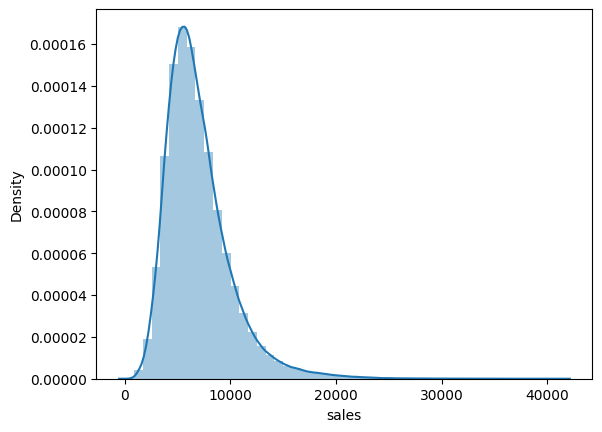

In [22]:
import seaborn as sns
import pandas as pd

# Supondo que df4 seja o seu DataFrame
sns.distplot(df4['sales'])

In [ ]:
# quanto mais normal a variavel normal , melhor o algortimo

/tmp/ipykernel_10797/2642276191.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log1p(df4['sales']))


<Axes: xlabel='sales', ylabel='Density'>

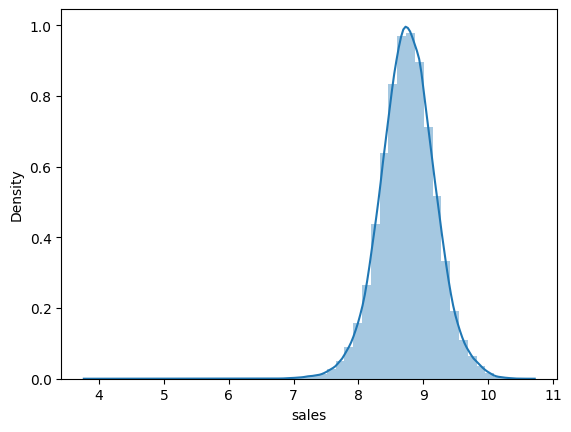

In [24]:
sns.distplot(np.log1p(df4['sales']))
#deu uma deslocada mais proximo da normal

#### numeric veriable

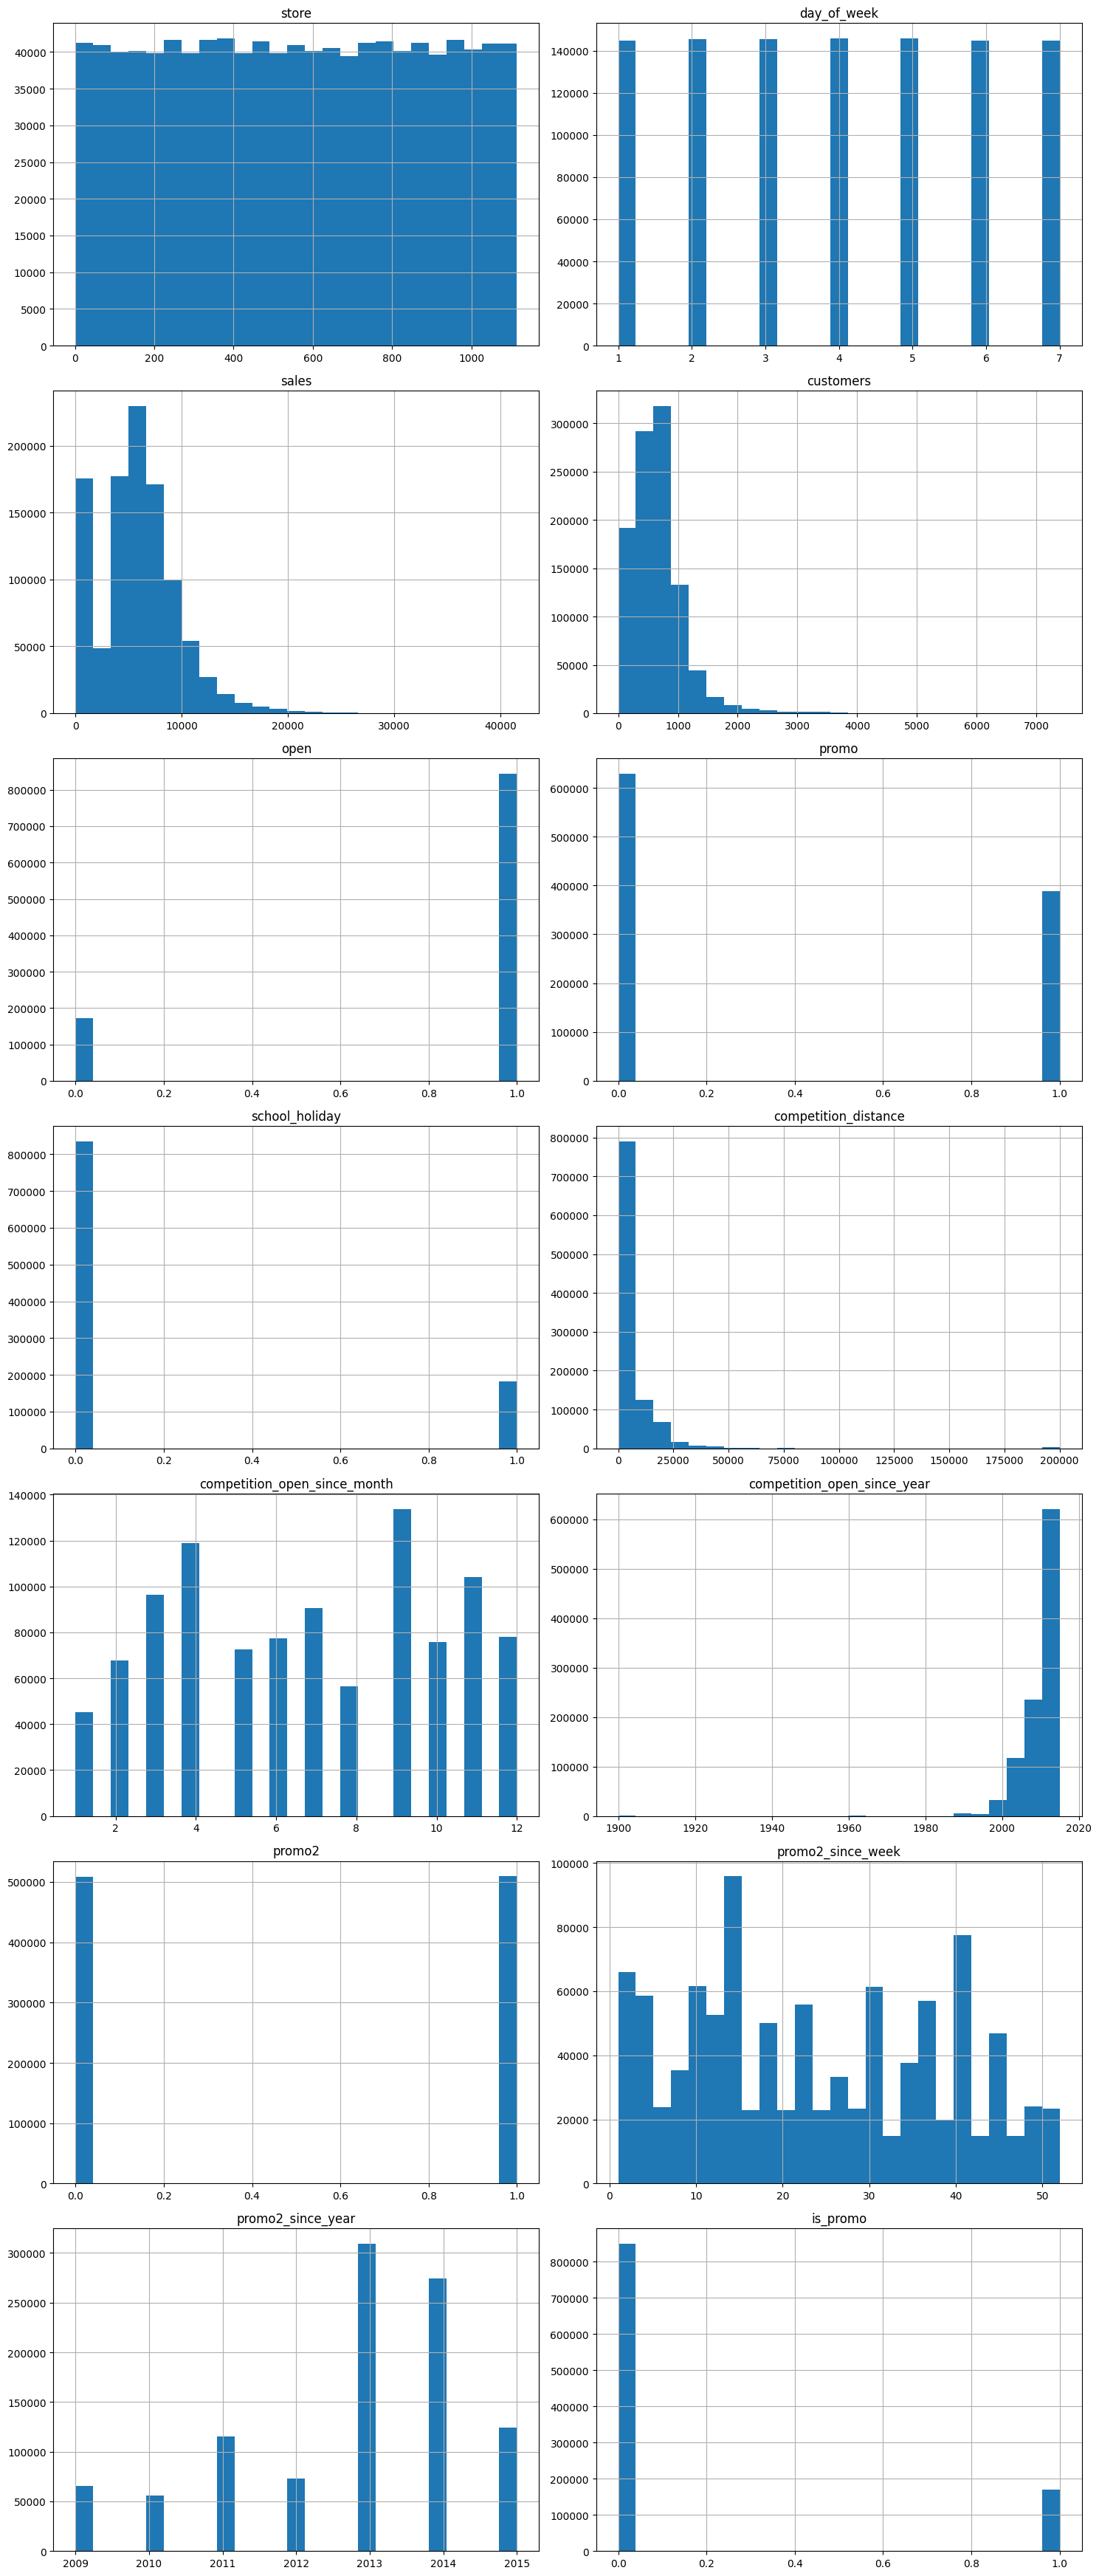

In [33]:
num_attributes = df1.select_dtypes(include=['int64','float64'])

import matplotlib.pyplot as plt

# Seleciona apenas as colunas numéricas
num_attributes = df1.select_dtypes(include=['int64', 'float64'])

# Define o número de colunas por linha no layout
cols_per_row = 2

# Calcula o número de linhas e colunas necessárias para acomodar todos os subplots
num_cols = len(num_attributes.columns)
num_rows = (num_cols + cols_per_row - 1) // cols_per_row

# Define o tamanho da figura
fig, axes = plt.subplots(num_rows, cols_per_row, figsize=(15, 5 * num_rows))

# Plota os histogramas
for i, column in enumerate(num_attributes.columns):
    ax = axes[i // cols_per_row, i % cols_per_row]  # Seleciona o subplot correto
    num_attributes[column].hist(bins=25, ax=ax)
    ax.set_title(column)

# Ajusta o espaçamento entre os subplots
plt.tight_layout()

# Mostra o gráfico
plt.show()


In [ ]:
# variavel is promo vende mais quando está sem promoção doq quando ta com promoção (necessita investigar , 
# since_year - vendeu mais nos ultimos anos 
# promo 2 since_yeak - vende abaixa vende abaixa
#promo 2 nao muda muito nas vendas
#copetition no ultimos anos abriu muito competidor
#tem muito competidores longes
#competidores vendem mais no final do ano

#### categorical variable

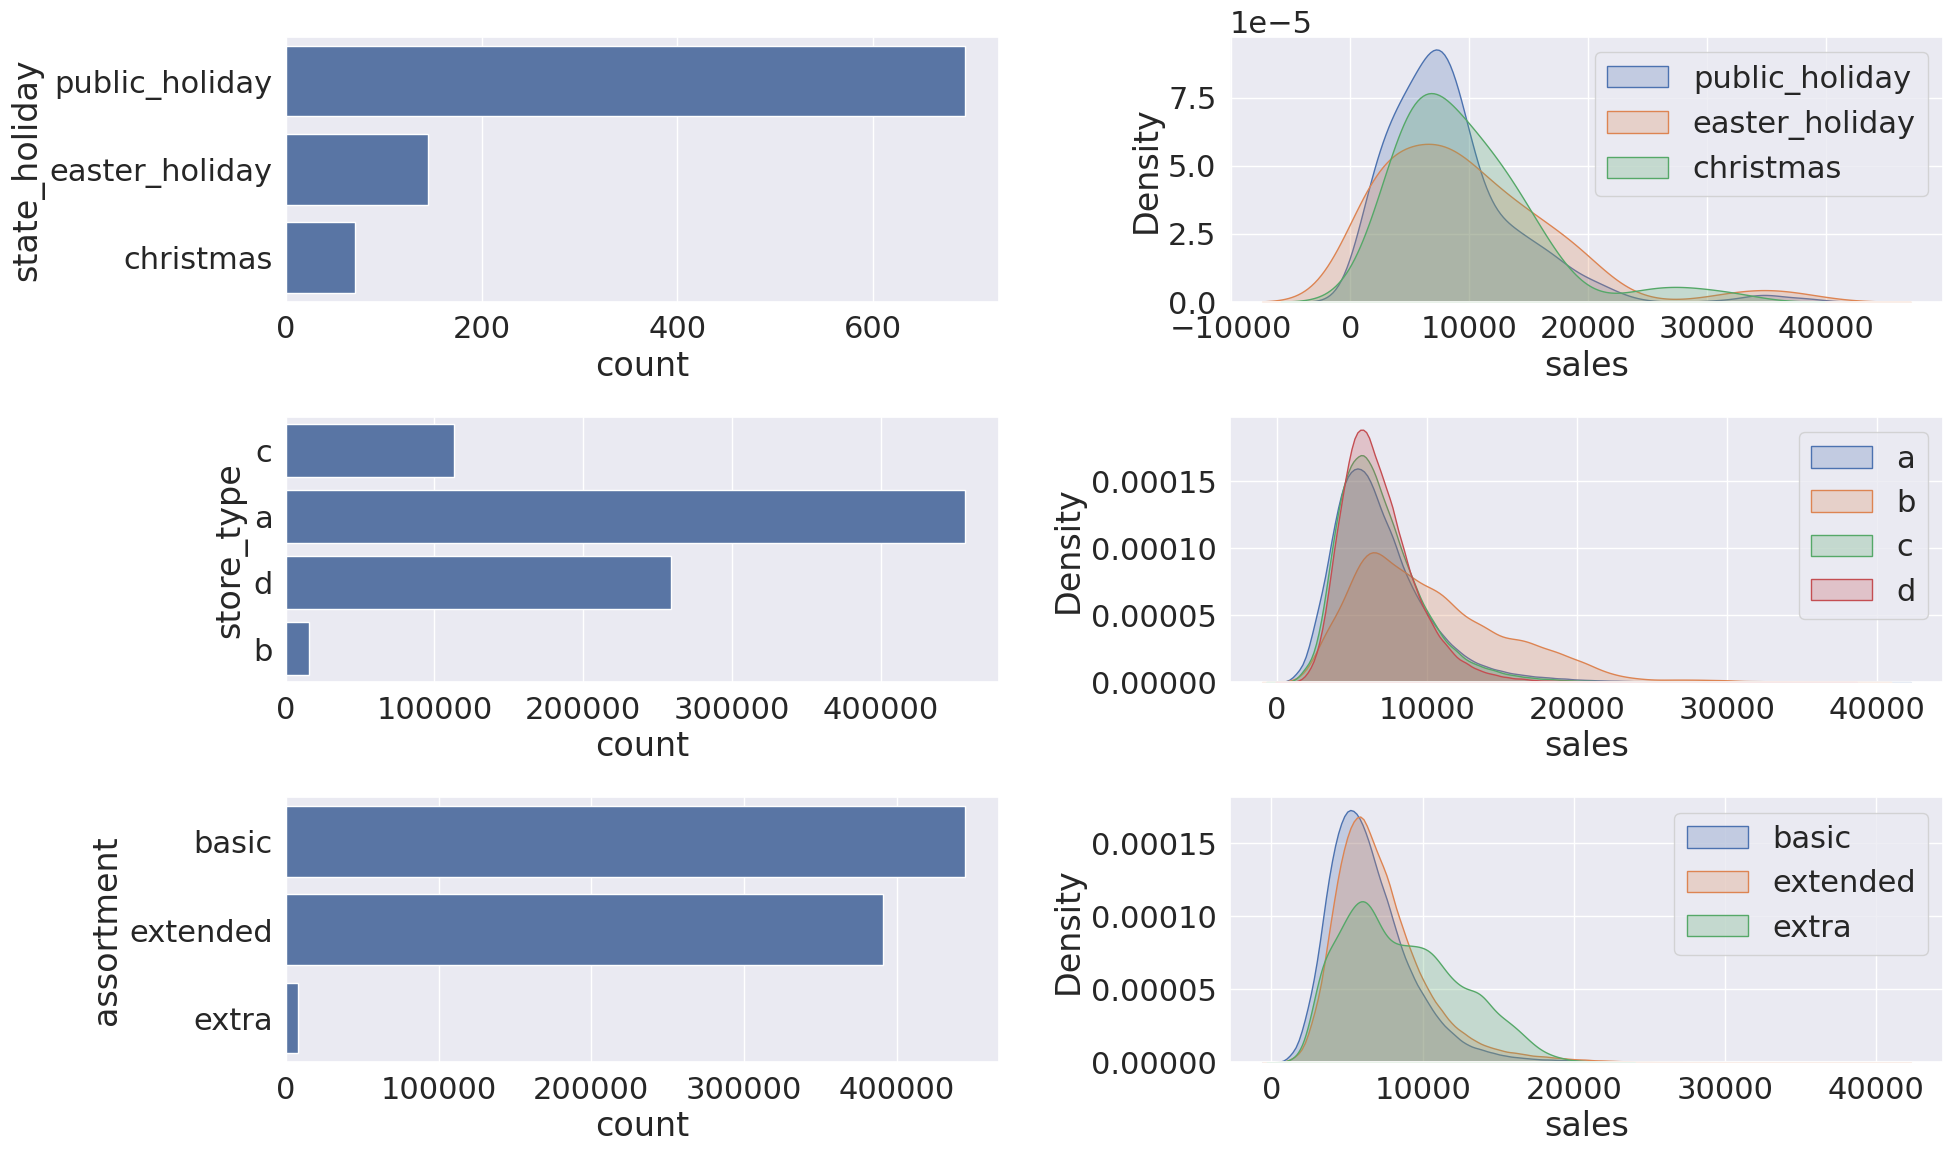

In [89]:
#resumir variavel categorica é boxplot , e count de cada variavel categorica
cat_attributes = df1.select_dtypes(exclude=['int64','float64','datetime64[ns]'])
a = df4.loc[df4['state_holiday'] != 'regular_day',]
df4['state_holiday'].drop_duplicates()

#state_holiday
plt.subplot(3,2,1)
sns.countplot(a['state_holiday'])
# tem mais venda em feriado publico depois pascoa dps natal
plt.subplot(3,2,2)
sns.kdeplot(df4[df4['state_holiday'] == 'public_holiday']['sales'],label='public_holiday',fill=True)
sns.kdeplot(df4[df4['state_holiday'] == 'easter_holiday']['sales'],label='easter_holiday',fill=True)
sns.kdeplot(df4[df4['state_holiday'] == 'christmas']['sales'],label='christmas',fill=True)
plt.legend()

# a pascoa tem menor numero de vendas mais dura por mais tempo
#importante 
#entao essa variavel vai ver importante para o negócio ja que se distingue bastante
sns.set(rc={'figure.figsize':(20, 12)})
plt.tight_layout(pad=2)
sns.set(font_scale=2)








#store_type
plt.subplot(3,2,3)
sns.countplot(df4['store_type'])
plt.subplot(3,2,4)
sns.kdeplot(df4[df4['store_type'] == 'a']['sales'],label='a',fill=True)
sns.kdeplot(df4[df4['store_type'] == 'b']['sales'],label='b',fill=True)
sns.kdeplot(df4[df4['store_type'] == 'c']['sales'],label='c',fill=True)
sns.kdeplot(df4[df4['store_type'] == 'd']['sales'],label='d',fill=True)
plt.legend()


sns.set(rc={'figure.figsize':(20, 12)})
plt.tight_layout(pad=2)
sns.set(font_scale=2)

#loja do tipo b tem uma alta concentração
















#assortment
#store_type
plt.subplot(3,2,5)
sns.countplot(df4['assortment'])
plt.subplot(3,2,6)
sns.kdeplot(df4[df4['assortment'] == 'basic']['sales'],label='basic',fill=True)
sns.kdeplot(df4[df4['assortment'] == 'extended']['sales'],label='extended',fill=True)
sns.kdeplot(df4[df4['assortment'] == 'extra']['sales'],label='extra',fill=True)
plt.legend()


sns.set(rc={'figure.figsize':(20, 12)})
plt.tight_layout(pad=2)
sns.set(font_scale=2)
#ver sobre distribuição







## analise bivariada 

In [ ]:
#Valindando 3 hipoteses que tinha feito anteriormente 

#LOJA COM MAIOR SORTIMENTO DEVERIA VENDER MAIS
#LOJA COM COMPETIDORES MAIS PROXIMOS DEVEERIAM VENDER MENOS
#LOJA COM COMPETIDORES A MAIS TEMPO DEVERIA VENDER MAIS

## H1 LOJA COM MAIOR SORTIMENTO DEVERIA VENDER MAIS


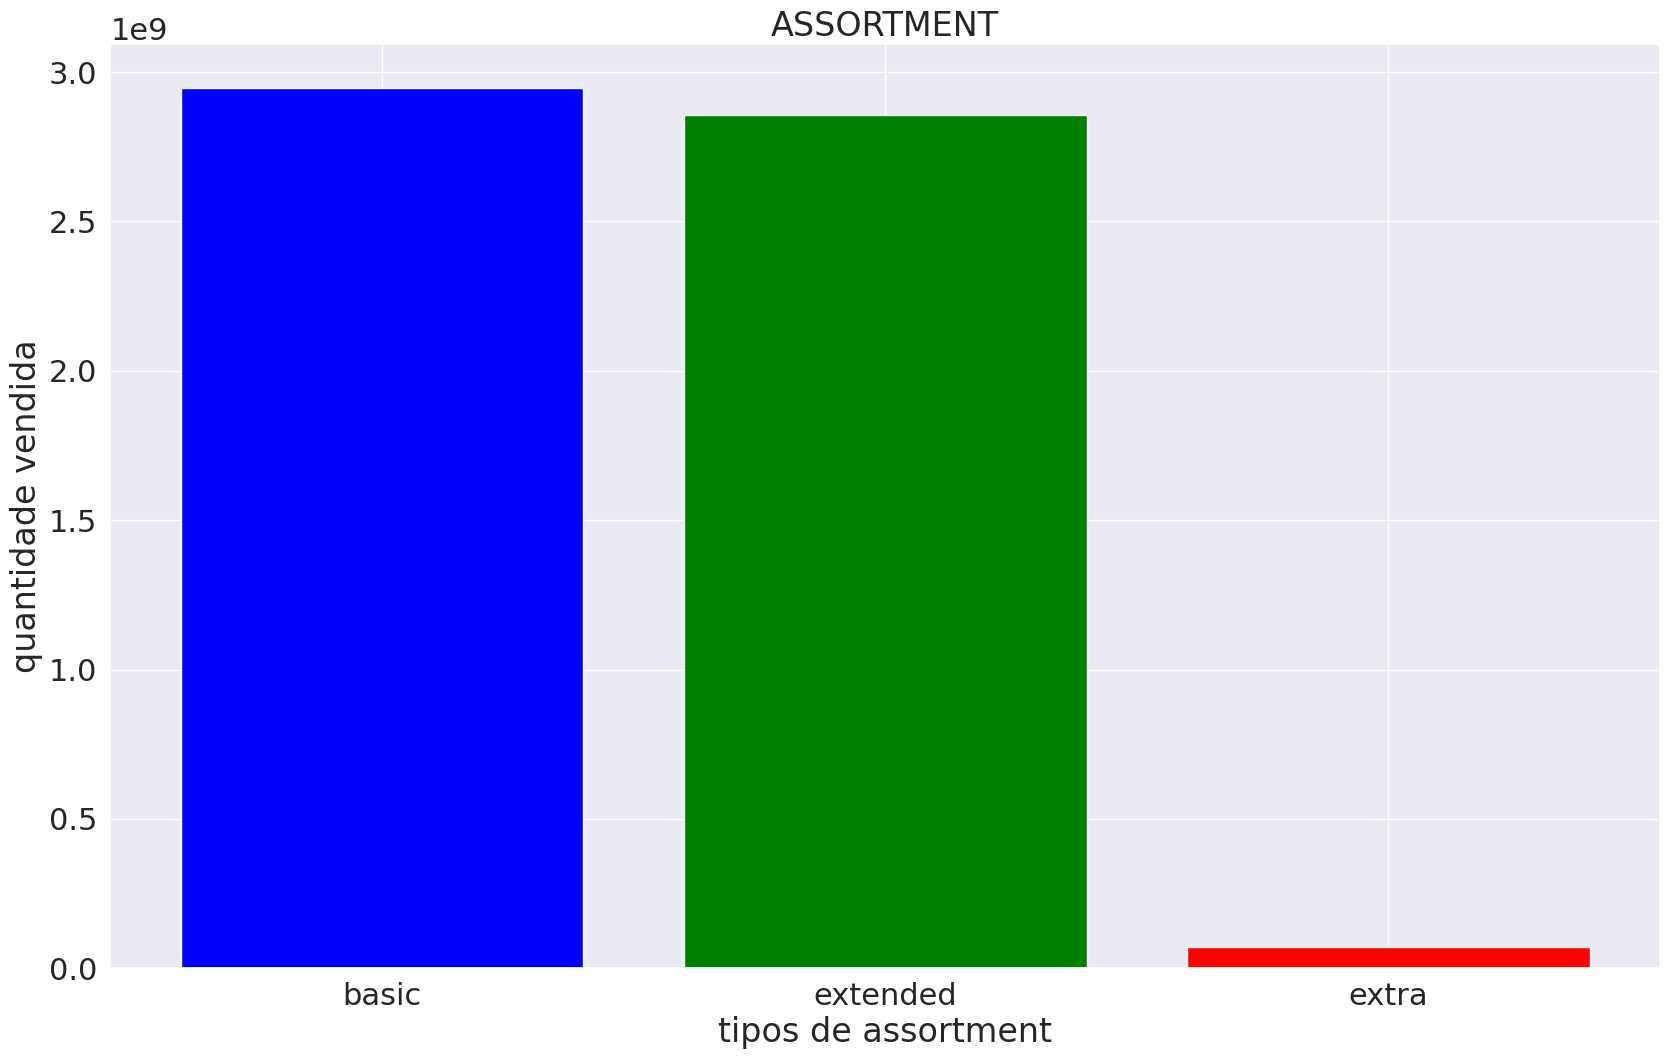

In [109]:
aux1 = df4.loc[:,['assortment','sales']].groupby('assortment').sum().reset_index()
plt.bar(aux1['assortment'],aux1['sales'],color=['blue', 'green', 'red'])
plt.xlabel('tipos de assortment')
plt.ylabel('quantidade vendida')
plt.title('ASSORTMENT');

In [ ]:
Resposta : lojas com maior assortment vende menos
pode afirmar pq tem dados para comprevar
hipótese falsa

essa feature vai ser importante para o modelo porq tem comportamentos diferentes
quando ver que algumas lojas com vendas extra vai ser bem diferente no modelo

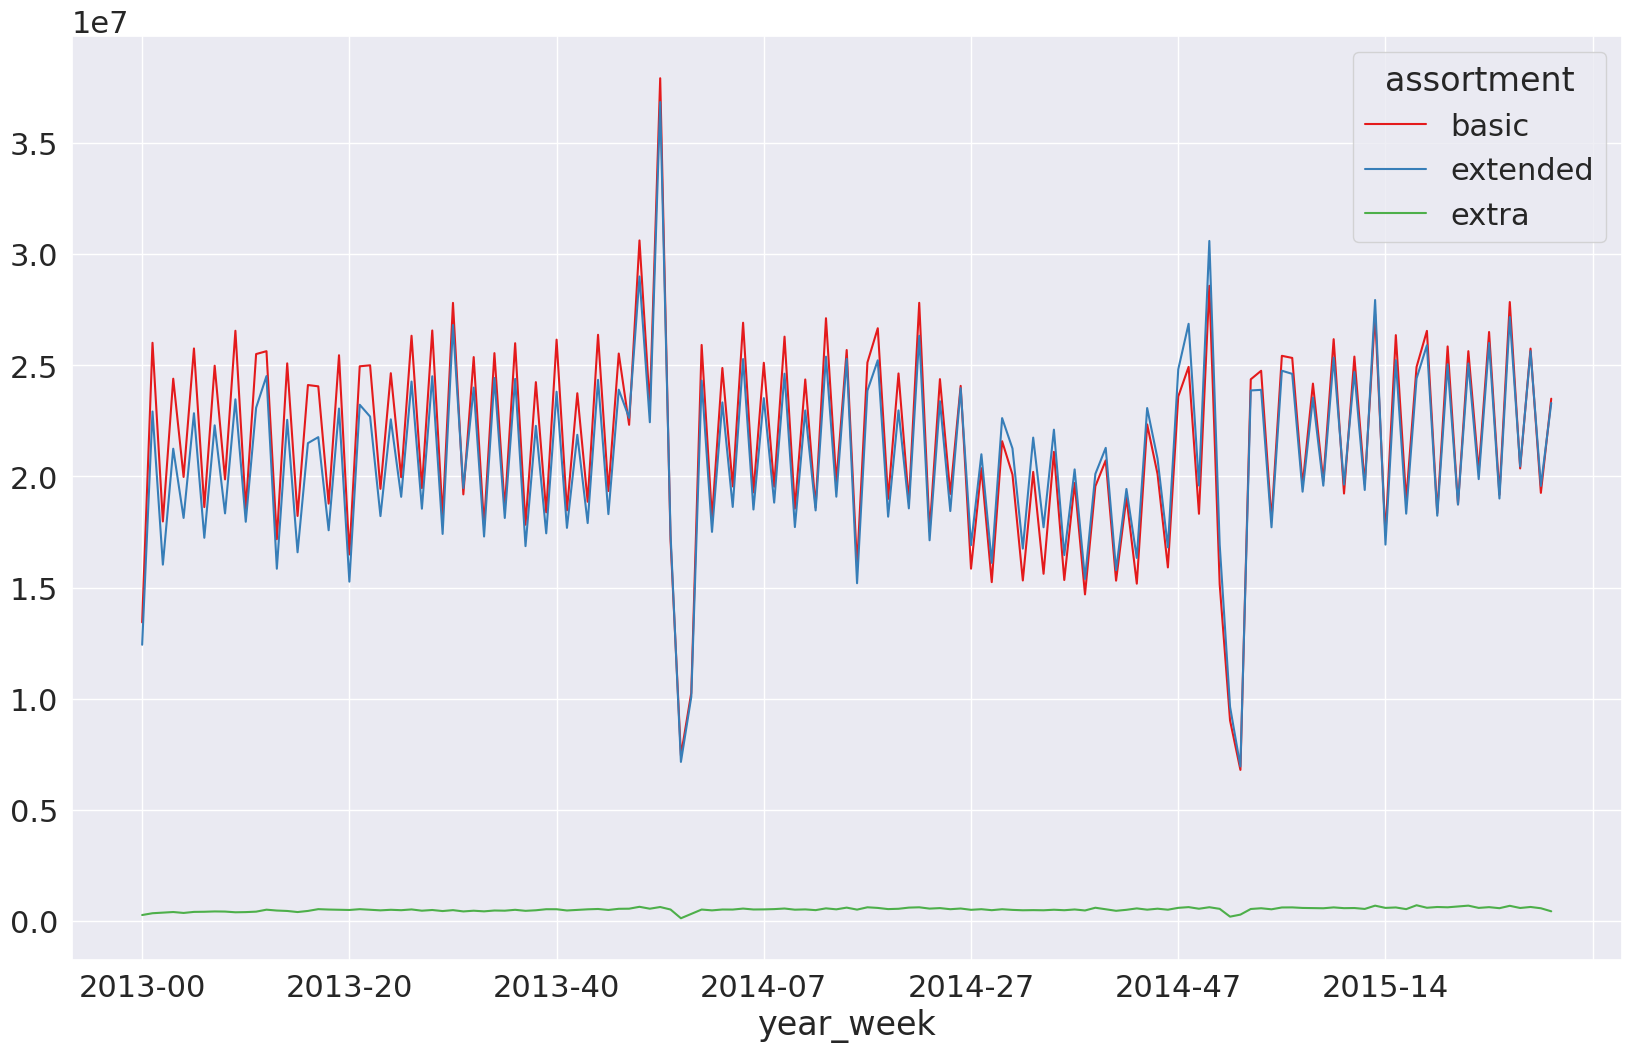

In [120]:
aux2 = df4.loc[:,['assortment','sales','year_week']].groupby(['year_week','assortment']).sum().reset_index()
aux3 = aux2.pivot(index='year_week' ,columns ='assortment' ,values= 'sales' )
aux3.plot();



In [117]:
aux3

assortment,basic,extended,extra
year_week,,,
2013-00,13434262,12425669,269404
2013-01,26007250,22917693,350279
2013-02,17970974,16029584,377207
2013-03,24392076,21243431,404662
2013-04,19972891,18130077,363061
...,...,...,...
2015-26,27840342,27165959,684180
2015-27,20356210,20449036,586036
2015-28,25746704,25629698,632017


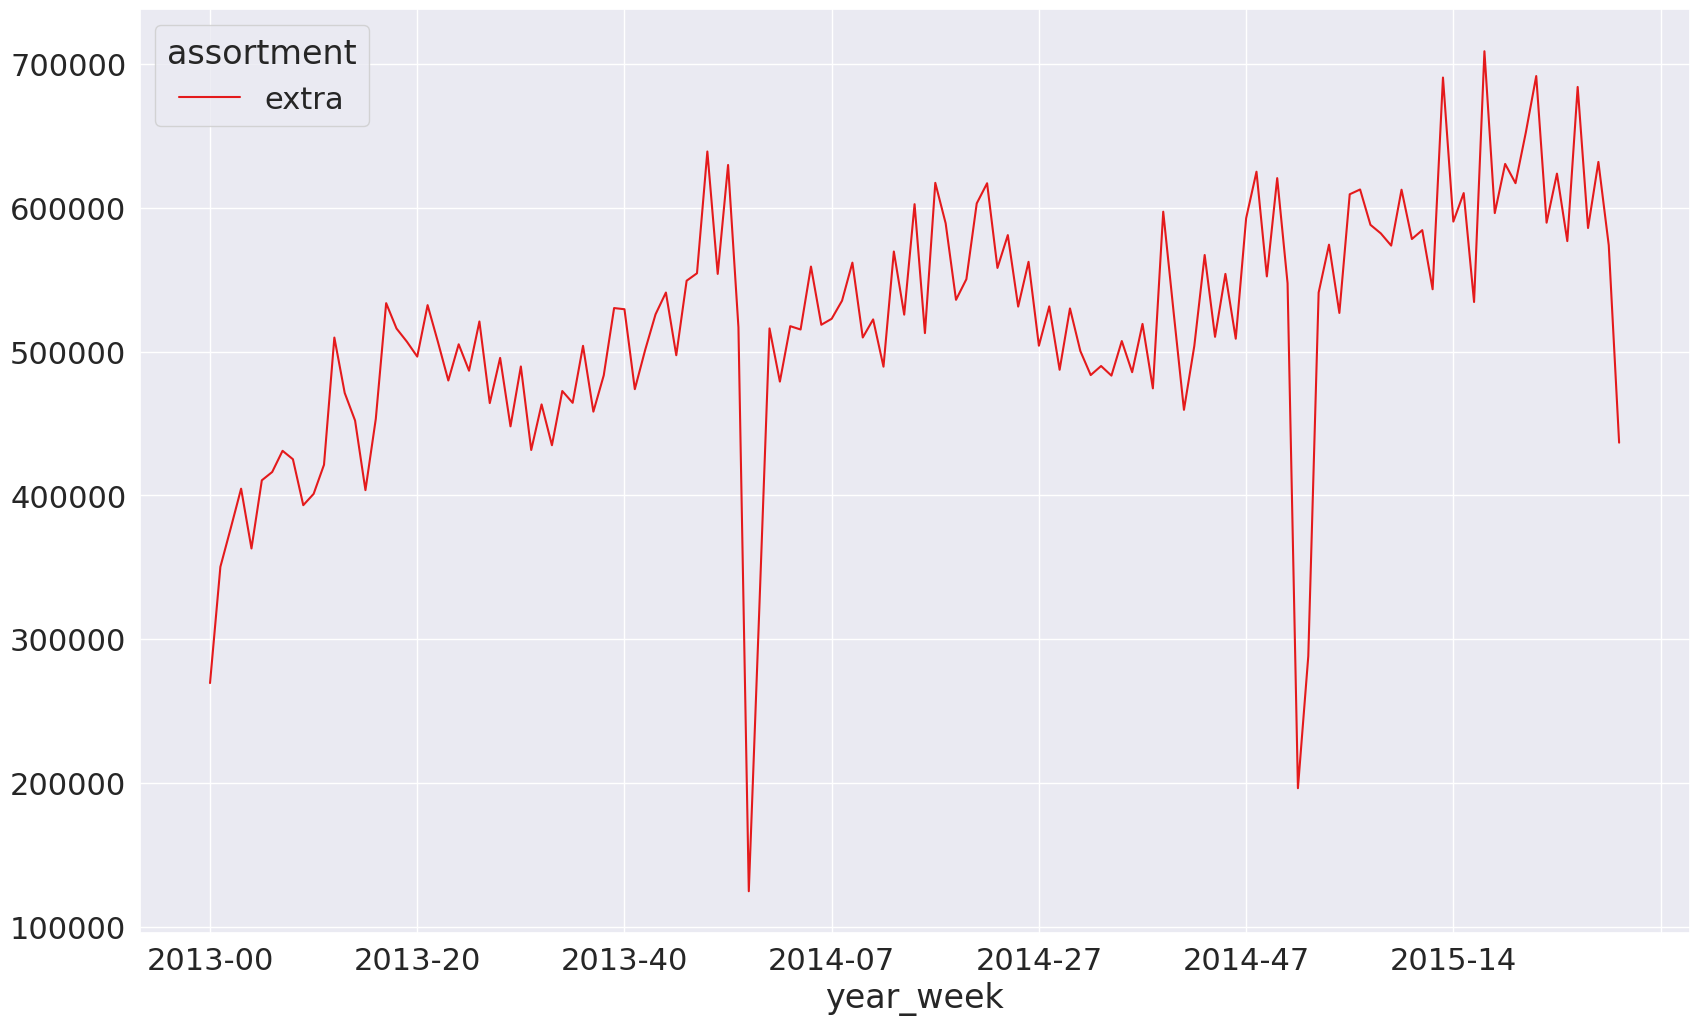

In [128]:
#vizualizar o extra pra ver se é linear mesmo 
aux4 = df4.loc[df4['assortment'] == 'extra',['year_week','assortment','sales']].groupby(['year_week','assortment']).sum().reset_index()
aux5 =aux4.pivot(index='year_week' , columns = 'assortment', values = 'sales').plot()



In [145]:
aux2

,competition_distance_bins,sales
0,"(0, 1000]",1832415839
1,"(1000, 2000]",918682669
2,"(2000, 3000]",610405362
3,"(3000, 4000]",378745560
4,"(4000, 5000]",325665741
5,"(5000, 6000]",218735915
6,"(6000, 7000]",168769215
7,"(7000, 8000]",133211838
8,"(8000, 9000]",180027950
9,"(9000, 10000]",121250715


## H2 LOJA COM COMPETIDORES MAIS PROXIMOS DEVEERIAM VENDER MENOS


/tmp/ipykernel_10797/2743794533.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  aux2 = aux1.loc[:,['competition_distance_bins','sales']].groupby('competition_distance_bins').sum().reset_index()


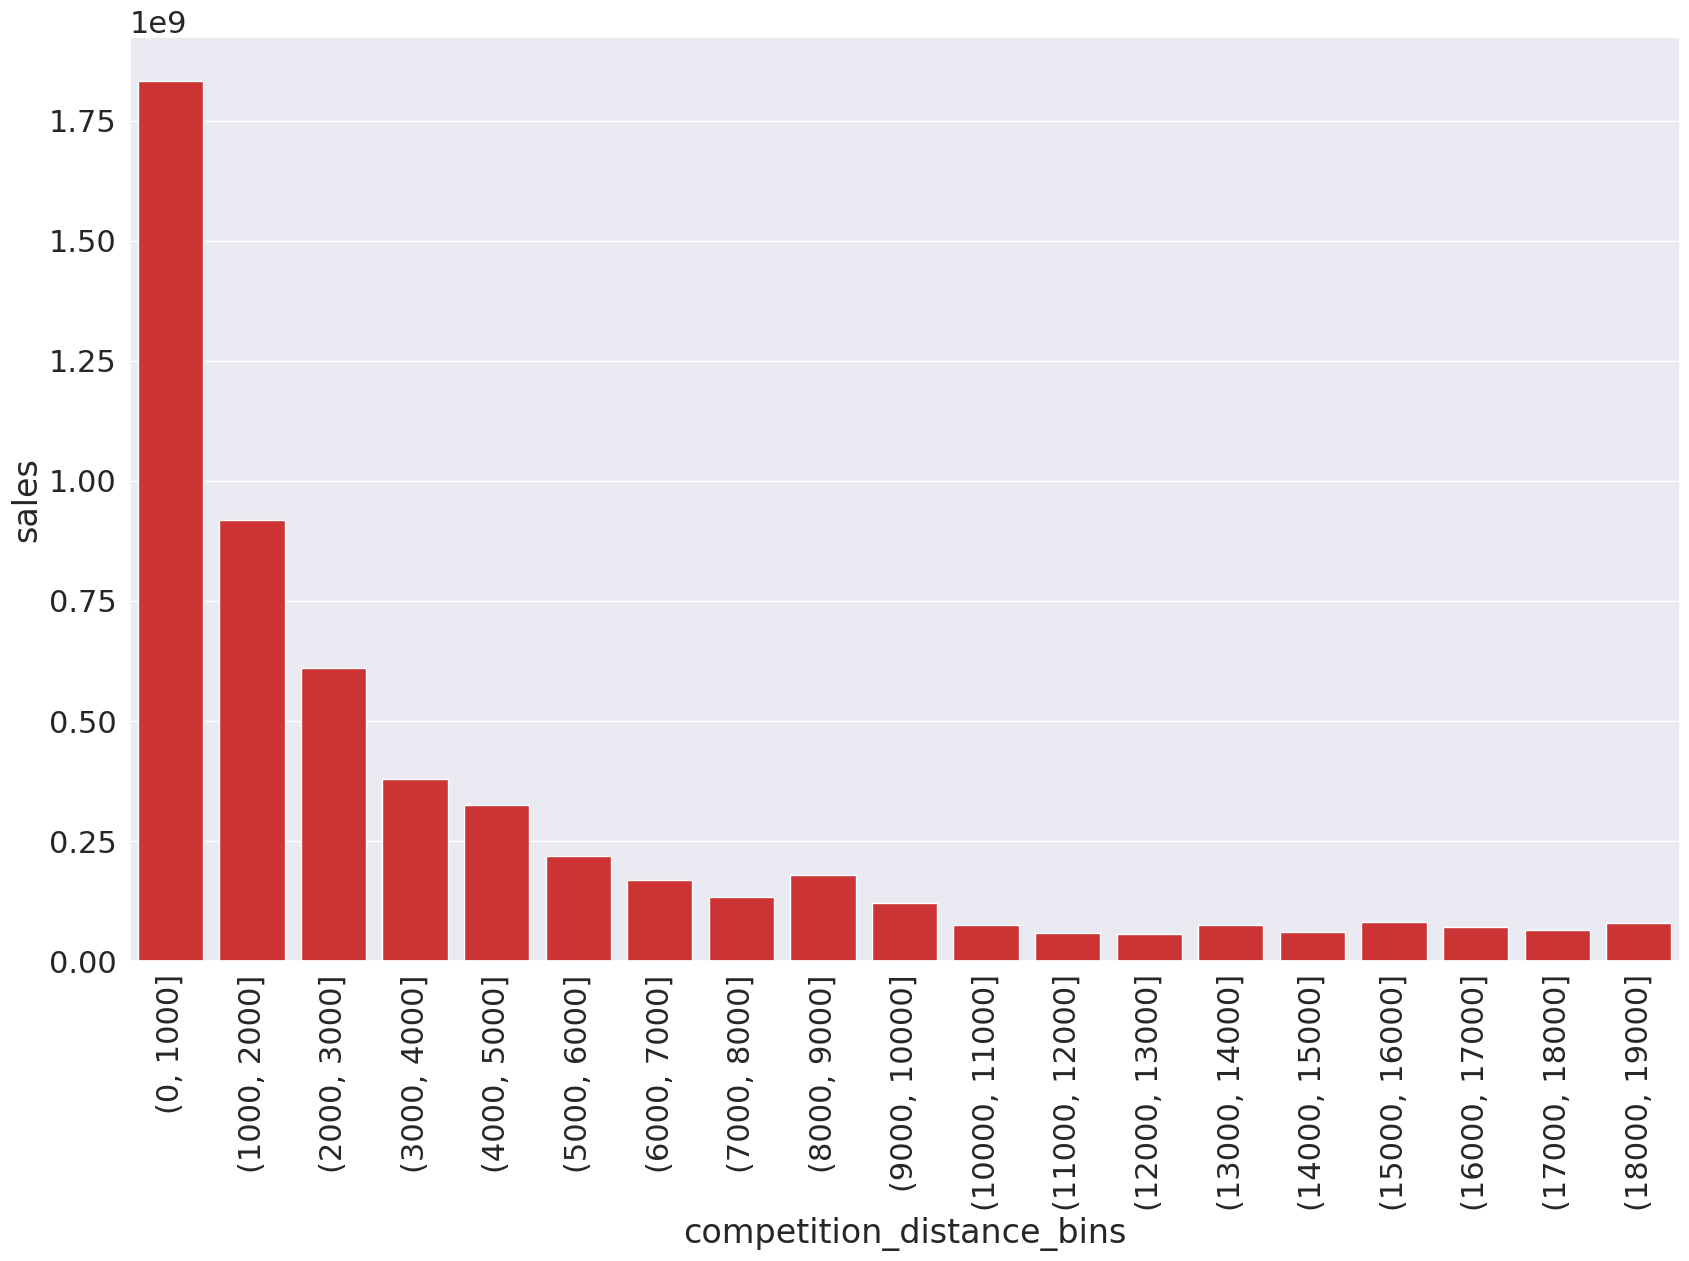

In [156]:
aux1 = df4.loc[:,['competition_distance','sales']].groupby('competition_distance').sum().reset_index()
bins = list(np.arange(0,20000,1000))
#cut é função para colocar cada coluna no seu bim 
aux1['competition_distance_bins'] = pd.cut(aux1['competition_distance'],bins=bins)
aux2 = aux1.loc[:,['competition_distance_bins','sales']].groupby('competition_distance_bins').sum().reset_index()

sns.barplot(x='competition_distance_bins',y='sales',data=aux2);
plt.xticks(rotation = 90);

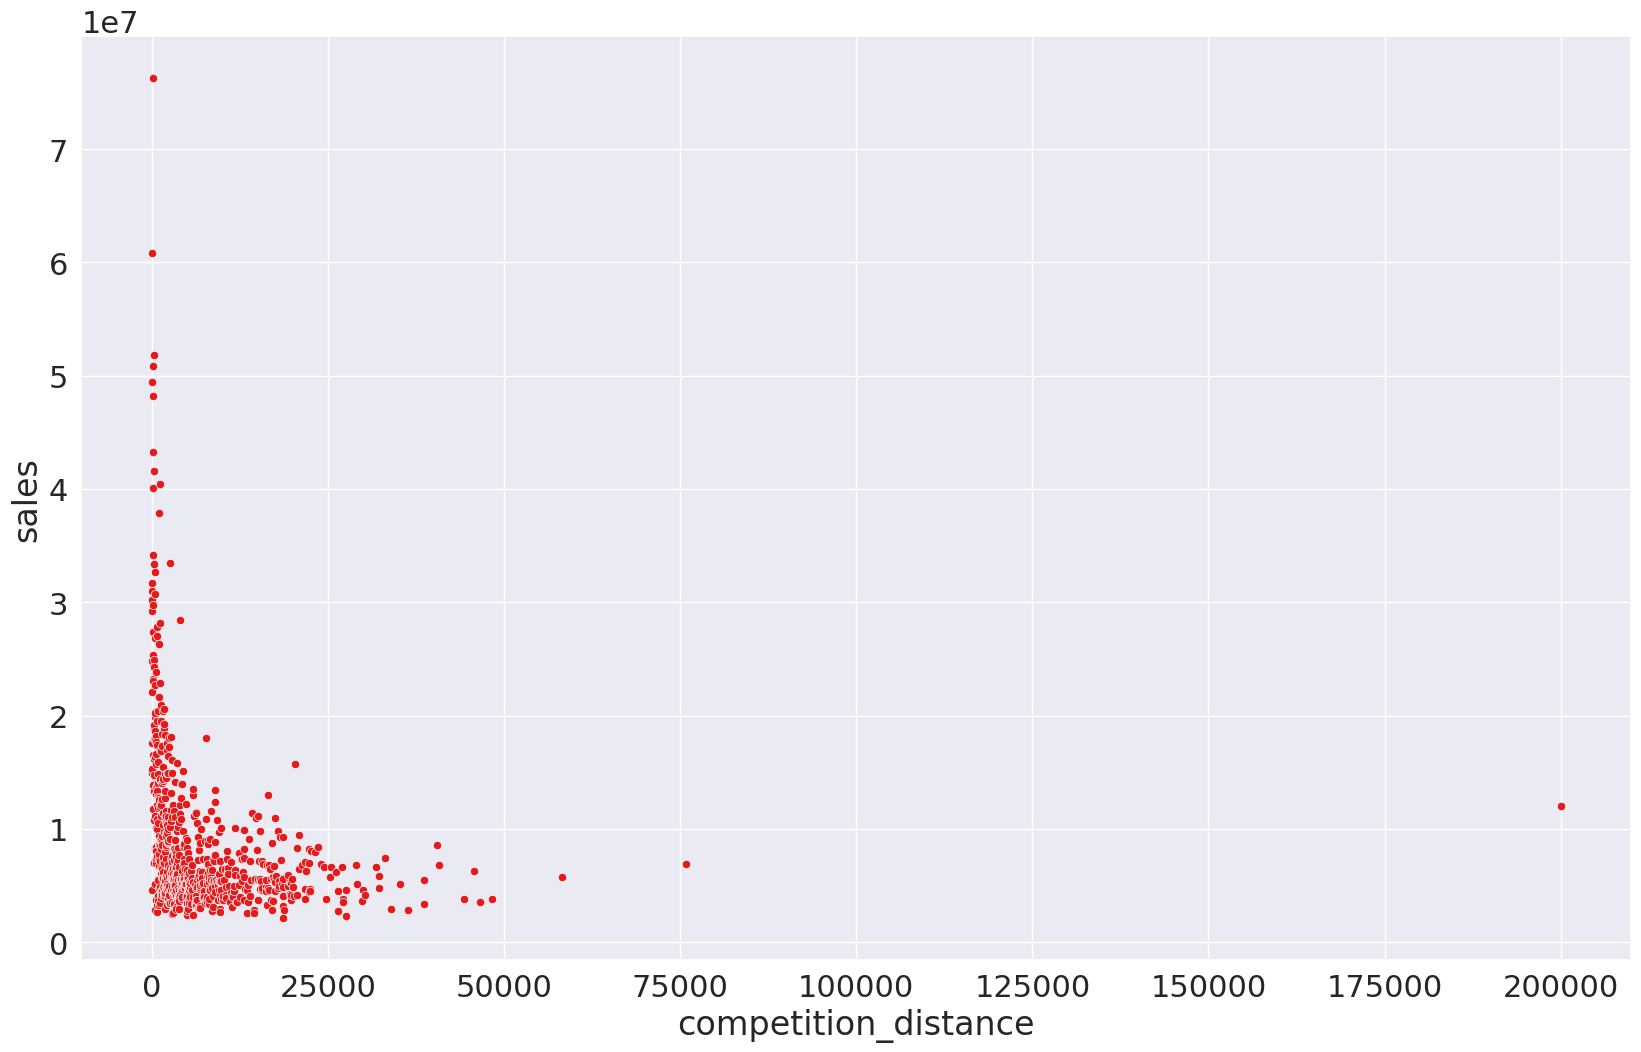

In [148]:
sns.scatterplot(data=aux1 , x='competition_distance' , y = 'sales');

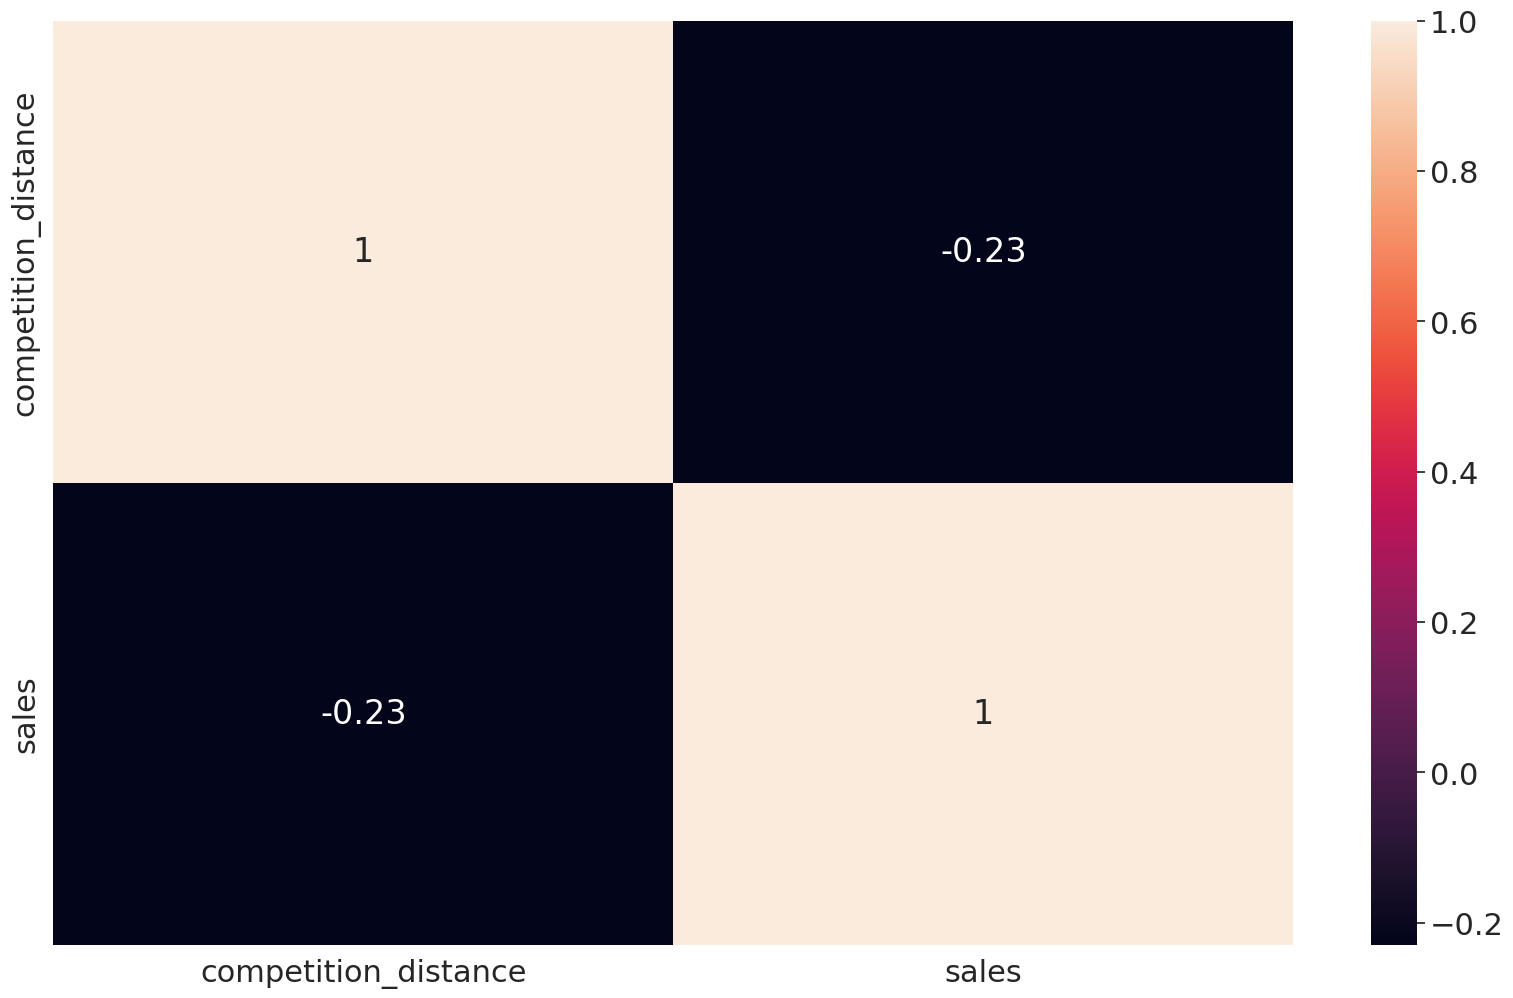

In [154]:
# corelação entre distance e sales

import seaborn as sns

# Remover a coluna 'competition_distance_bins'
aux1_numeric = aux1.drop(columns=['competition_distance_bins'])

# Calcula a matriz de correlação
correlation_matrix = aux1_numeric.corr(method='pearson')

# Plota o heatmap
sns.heatmap(correlation_matrix, annot=True)

# Mostra o gráfico
plt.show() 


# ta mostrando que a relação é de -0,2 entao nao tem tanta correlação 
entao quer dizer que nao faz sentido afirma que quanto mais competidores proximo a loja vende menos

In [ ]:
H2 - rejeita H2 , podemos afimar q lojas com competidores mais proximos nao vendem menos
lojas com competidores mais proximos vendem mais

## H3 LOJA COM COMPETIDORES A MAIS TEMPO DEVERIA VENDER MAIS

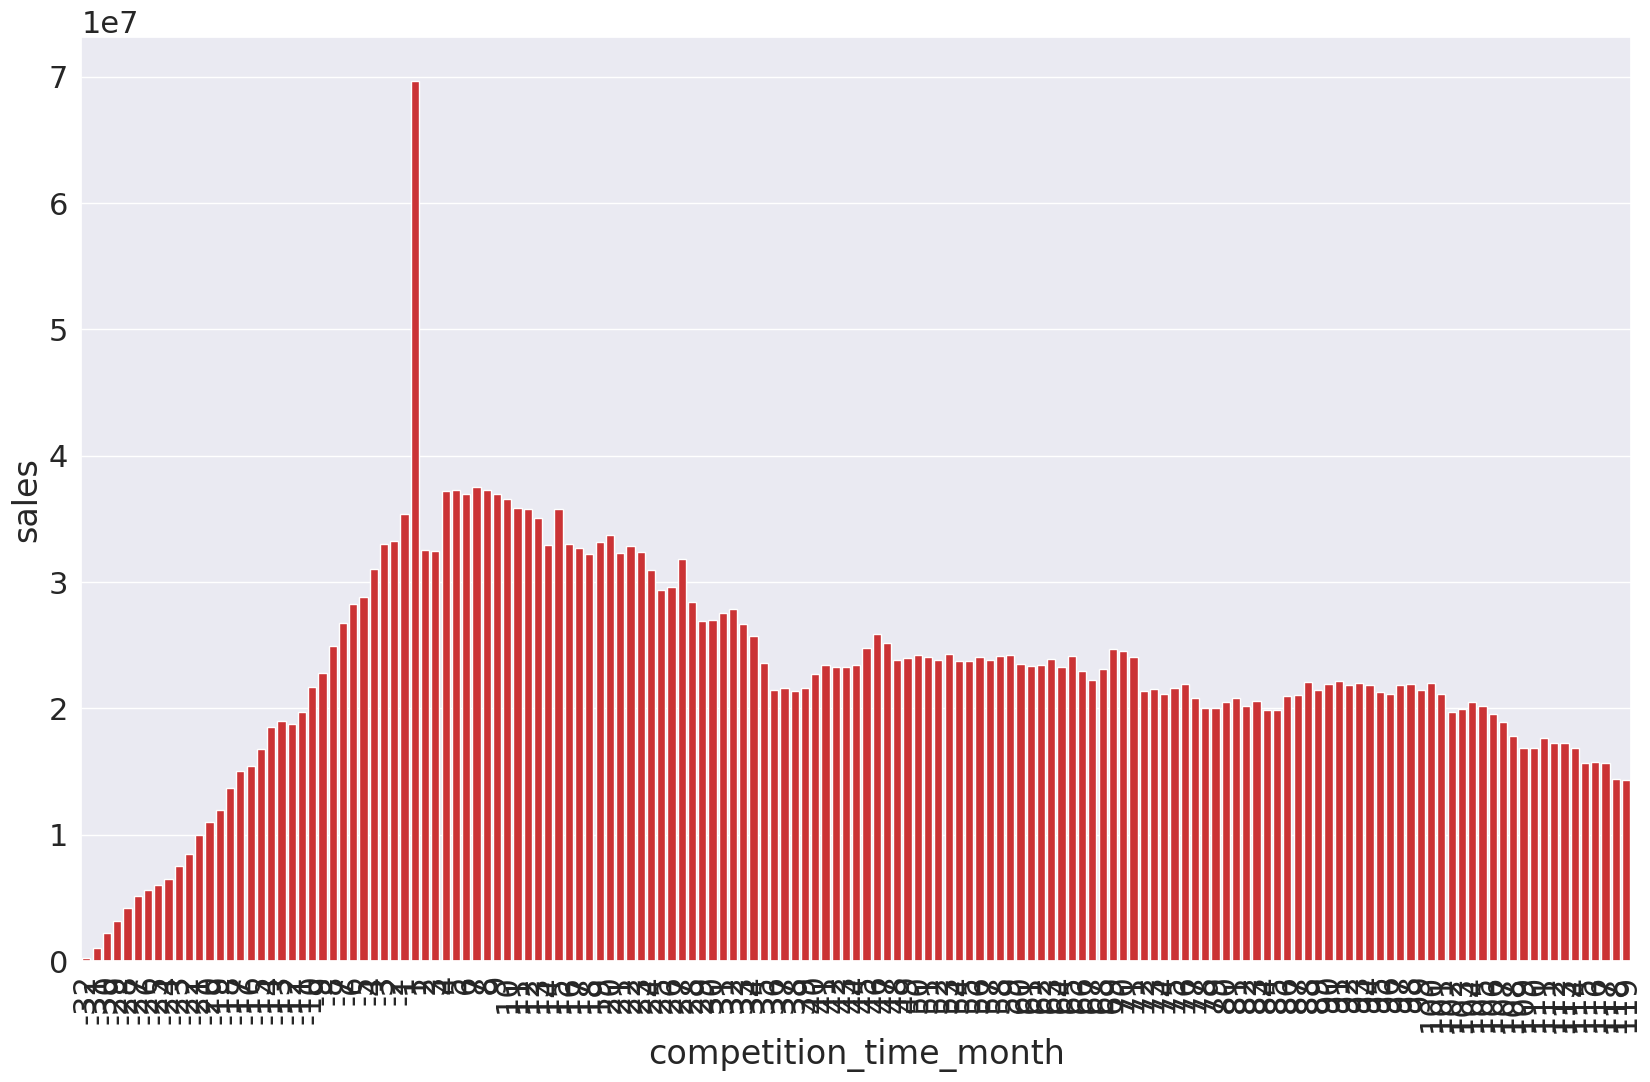

In [170]:
aux1 = df4.loc[:,['competition_time_month','sales']].groupby('competition_time_month').sum().reset_index()
aux2 = aux1.loc[(aux1['competition_time_month'] < 120) & (aux1['competition_time_month'] != 0 ),]
sns.barplot(x='competition_time_month',y= 'sales',data = aux2);
plt.xticks(rotation=90);
# quer dizer que todos competidores q começaram a v

In [ ]:
esse grafico está mostrando que quanro mais recente
é a competição maior é a venda é mais uma cotradição ao senso comum (insight)
normalmente é o contrario quando abre competidor deveria vender menos

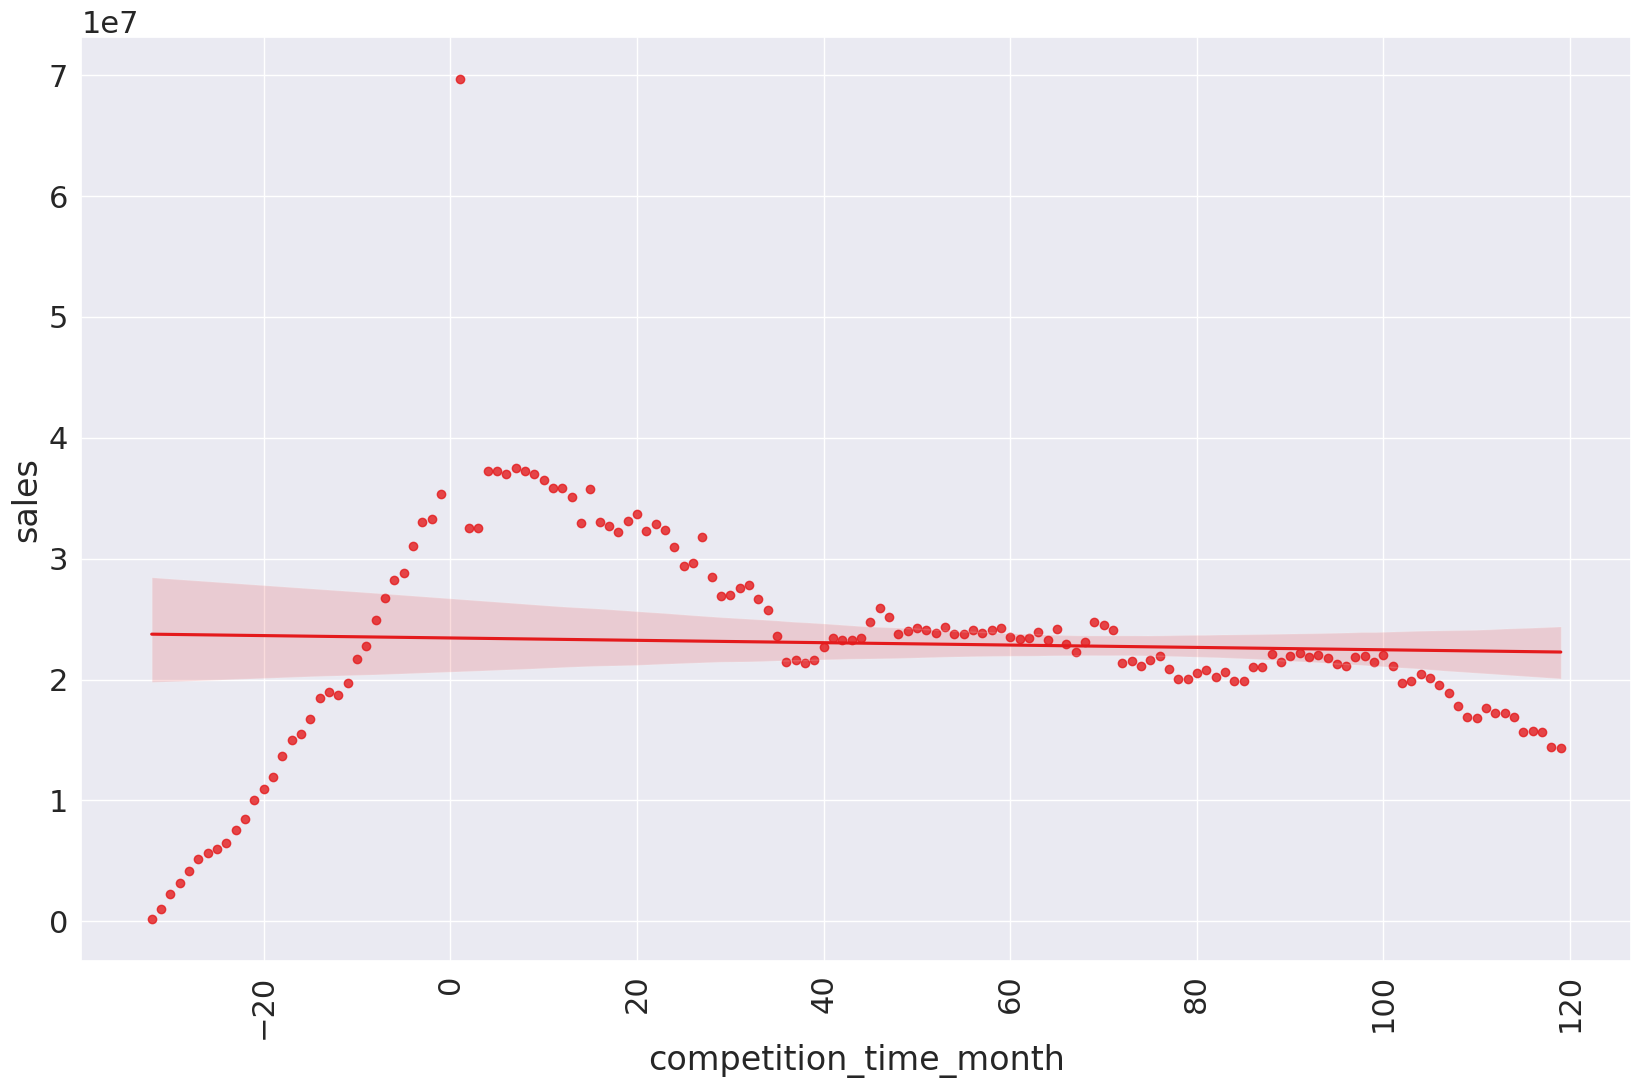

In [171]:
sns.regplot(x='competition_time_month',y= 'sales',data = aux2);
plt.xticks(rotation=90);

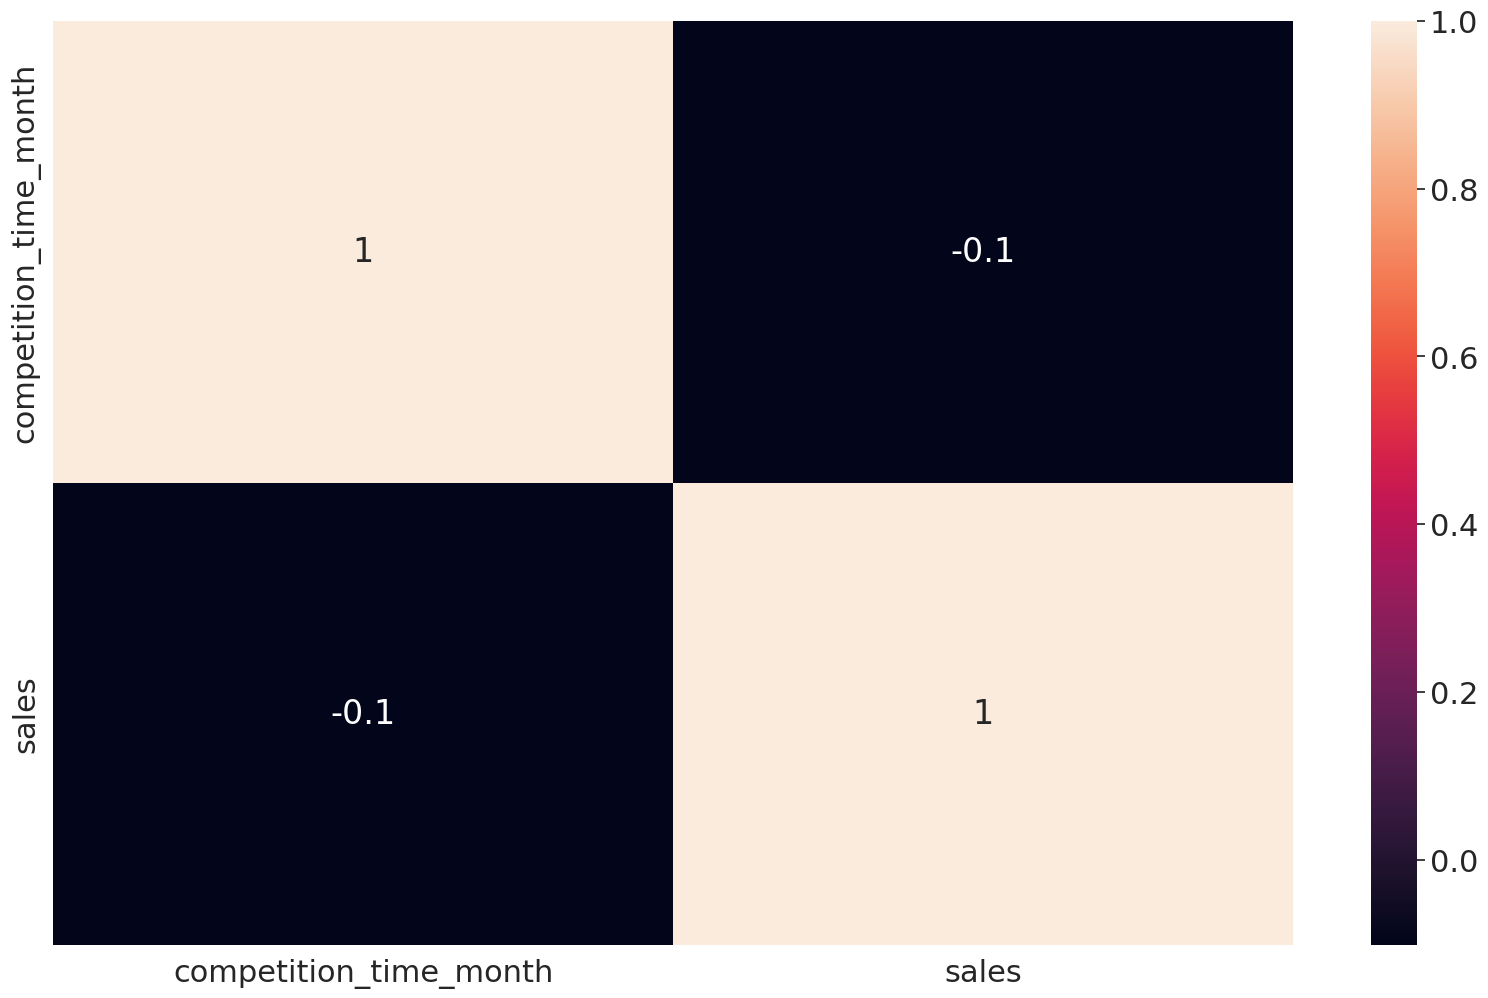

In [172]:

# Plota o heatmap
sns.heatmap(aux1.corr(method='pearson'), annot=True)
plt.show() 
#corelçaõ de 0 as duas variavei nao tem corelação por isso foi um insight
#faz sentido quando duas variavez que era pra ter correlacao e nao tem provavelmente em insight


In [ ]:
H3 - recusa H3 
pois lojas com competidores mais recentes vendem mais

## H4 lojas com promoção ativas por mais tempo deveriam vender mais 

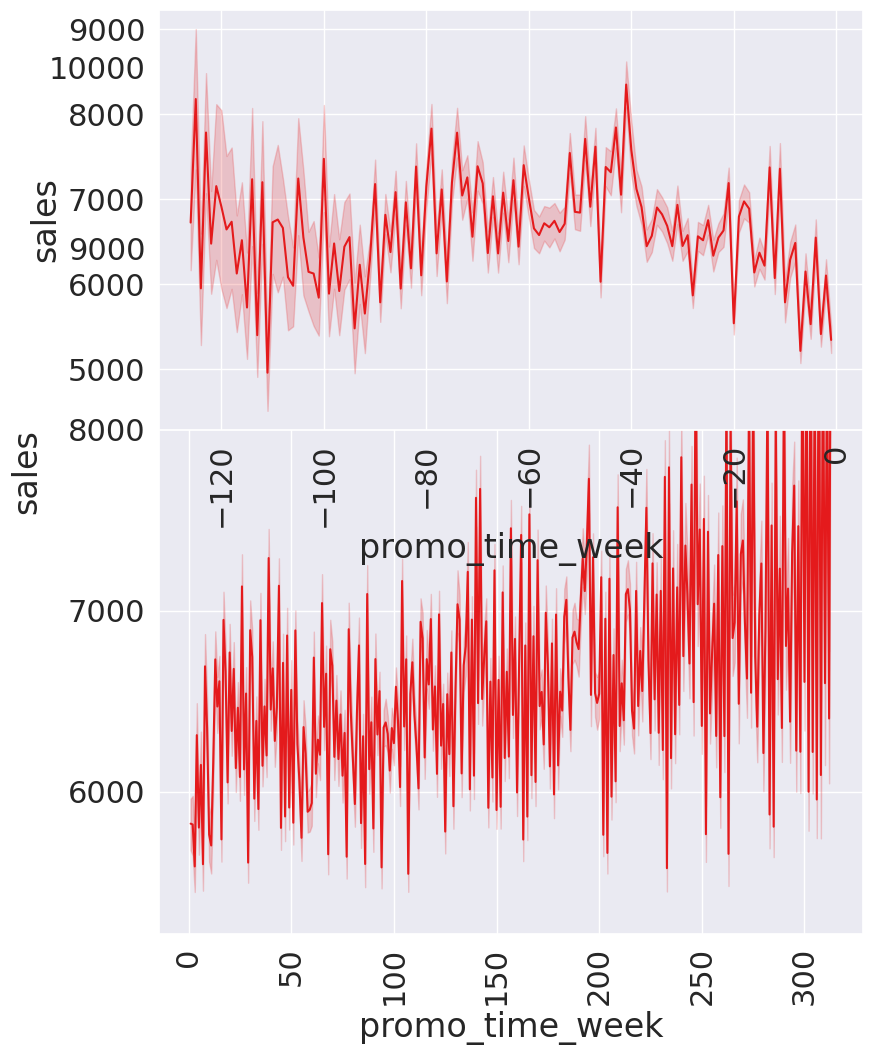

In [207]:
#promo regular é 0 e promo extendida é a promo regular - a compra ou ao contratio e vai da pra saber se ta na extendida
aux1 = df4.loc[:,['promo_time_week','sales']].groupby('promo_time_week').sum().reset_index()
#sns.barplot(x='promo_time_week',y='sales',data=aux1)

plt.subplot(1,2,1)
aux2 = df4.loc[df4['promo_time_week'] > 0,]# promo extendida
sns.lineplot(x='promo_time_week',y='sales',data=aux2);
plt.xticks(rotation = 90);

plt.subplot(2,2,1)
aux3 = df4.loc[df4['promo_time_week'] < 0,]# promo regular
sns.lineplot(x='promo_time_week',y='sales',data=aux3);
sns.regplot(x='promo_time_week', y='sales', data=aux3, scatter=False, color='red')  # Adiciona uma linha de tendência

plt.xticks(rotation = 90);

#vai ver todas as vendas em dias apos e antes a promoção

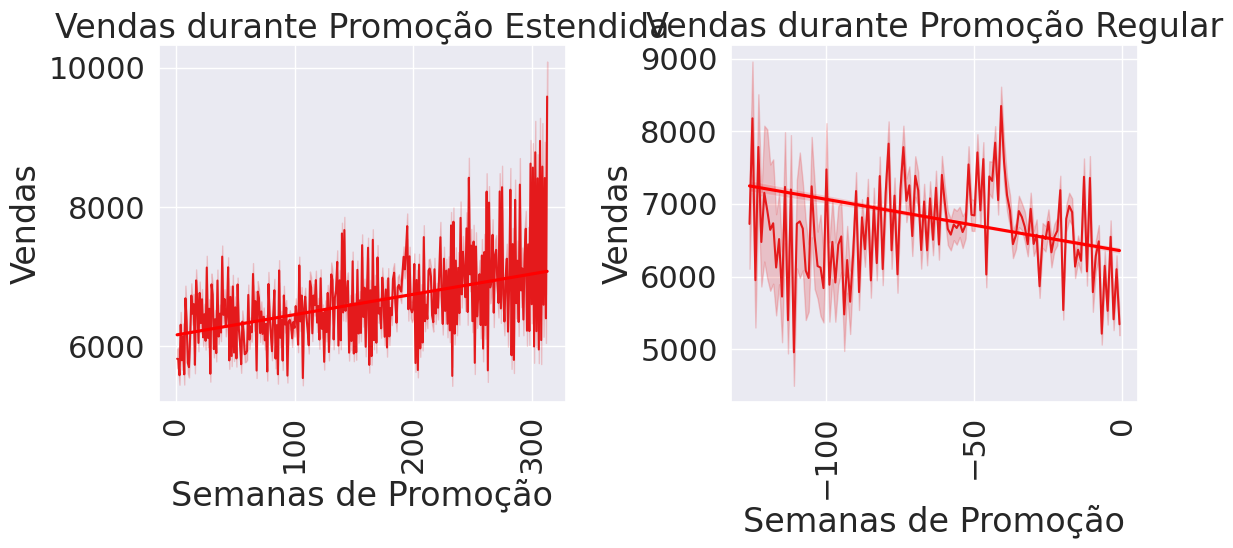

In [208]:
import matplotlib.pyplot as plt
import seaborn as sns

# Definindo o tamanho da figura
plt.figure(figsize=(12, 6))

# Subplot para promoção estendida
plt.subplot(1, 2, 1)
aux2 = df4.loc[df4['promo_time_week'] > 0]
sns.lineplot(x='promo_time_week', y='sales', data=aux2)
sns.regplot(x='promo_time_week', y='sales', data=aux2, scatter=False, color='red')  # Adiciona uma linha de tendência
plt.title('Vendas durante Promoção Estendida')
plt.xlabel('Semanas de Promoção')
plt.ylabel('Vendas')
plt.xticks(rotation=90)

# Subplot para promoção regular
plt.subplot(2, 2, 1)
aux3 = df4.loc[df4['promo_time_week'] < 0]
sns.lineplot(x='promo_time_week', y='sales', data=aux3)
sns.regplot(x='promo_time_week', y='sales', data=aux3, scatter=False, color='red')  # Adiciona uma linha de tendência
plt.title('Vendas durante Promoção Regular')
plt.xlabel('Semanas de Promoção')
plt.ylabel('Vendas')
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

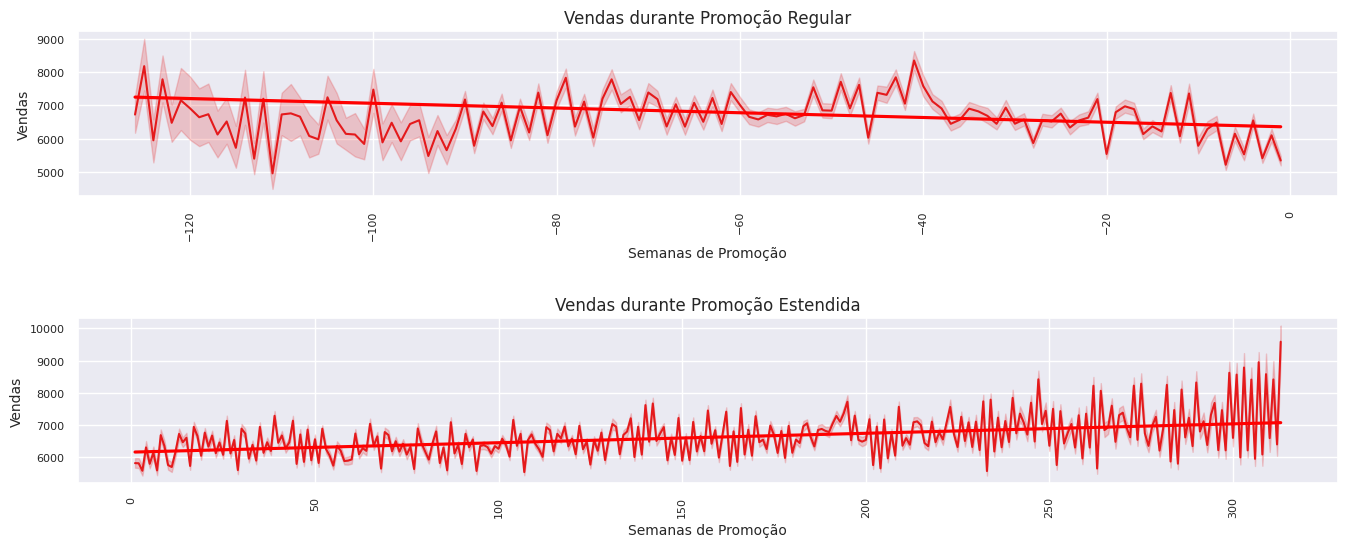

In [211]:
import matplotlib.pyplot as plt
import seaborn as sns

# Definindo o tamanho da figura
plt.figure(figsize=(14, 6))

# Subplot para promoção estendida
plt.subplot(2, 1, 2)
aux2 = df4.loc[df4['promo_time_week'] > 0]
sns.lineplot(x='promo_time_week', y='sales', data=aux2)
sns.regplot(x='promo_time_week', y='sales', data=aux2, scatter=False, color='red')  # Adiciona uma linha de tendência
plt.title('Vendas durante Promoção Estendida', fontsize=12)
plt.xlabel('Semanas de Promoção', fontsize=10)
plt.ylabel('Vendas', fontsize=10)
plt.xticks(rotation=90)
plt.tick_params(axis='both', labelsize=8)  # Diminui o tamanho das legendas dos eixos

# Subplot para promoção regular
plt.subplot(2, 1, 1)
aux3 = df4.loc[df4['promo_time_week'] < 0]
sns.lineplot(x='promo_time_week', y='sales', data=aux3)
sns.regplot(x='promo_time_week', y='sales', data=aux3, scatter=False, color='red')  # Adiciona uma linha de tendência
plt.title('Vendas durante Promoção Regular', fontsize=12)
plt.xlabel('Semanas de Promoção', fontsize=10)
plt.ylabel('Vendas', fontsize=10)
plt.xticks(rotation=90)
plt.tick_params(axis='both', labelsize=8)  # Diminui o tamanho das legendas dos eixos

# Ajustando o espaçamento entre os subplots
plt.subplots_adjust(wspace=0.3)

plt.tight_layout()
plt.show()

In [218]:
aux3 = df4.loc[df4['promo_time_week'] < 0,'sales'].mean()
aux3

6637.540032494191

In [219]:
aux2 = df4.loc[df4['promo_time_week'] > 0,'sales'].mean()
aux2

6549.938180494786

In [ ]:
A HIOTESE É falsa , LOJAS COM PROMOÇÃO ATIVA POR MAIS TEMPO VENDEM MENOS OU A MESMA QUANTIDADE 
APESAR DE TER UMA LINHA DE TENDENCIA CRESCENTE ELA NAO ESTA VENDENDO MAIS QUE A OUTRA
TENDENCIA DE ALTA

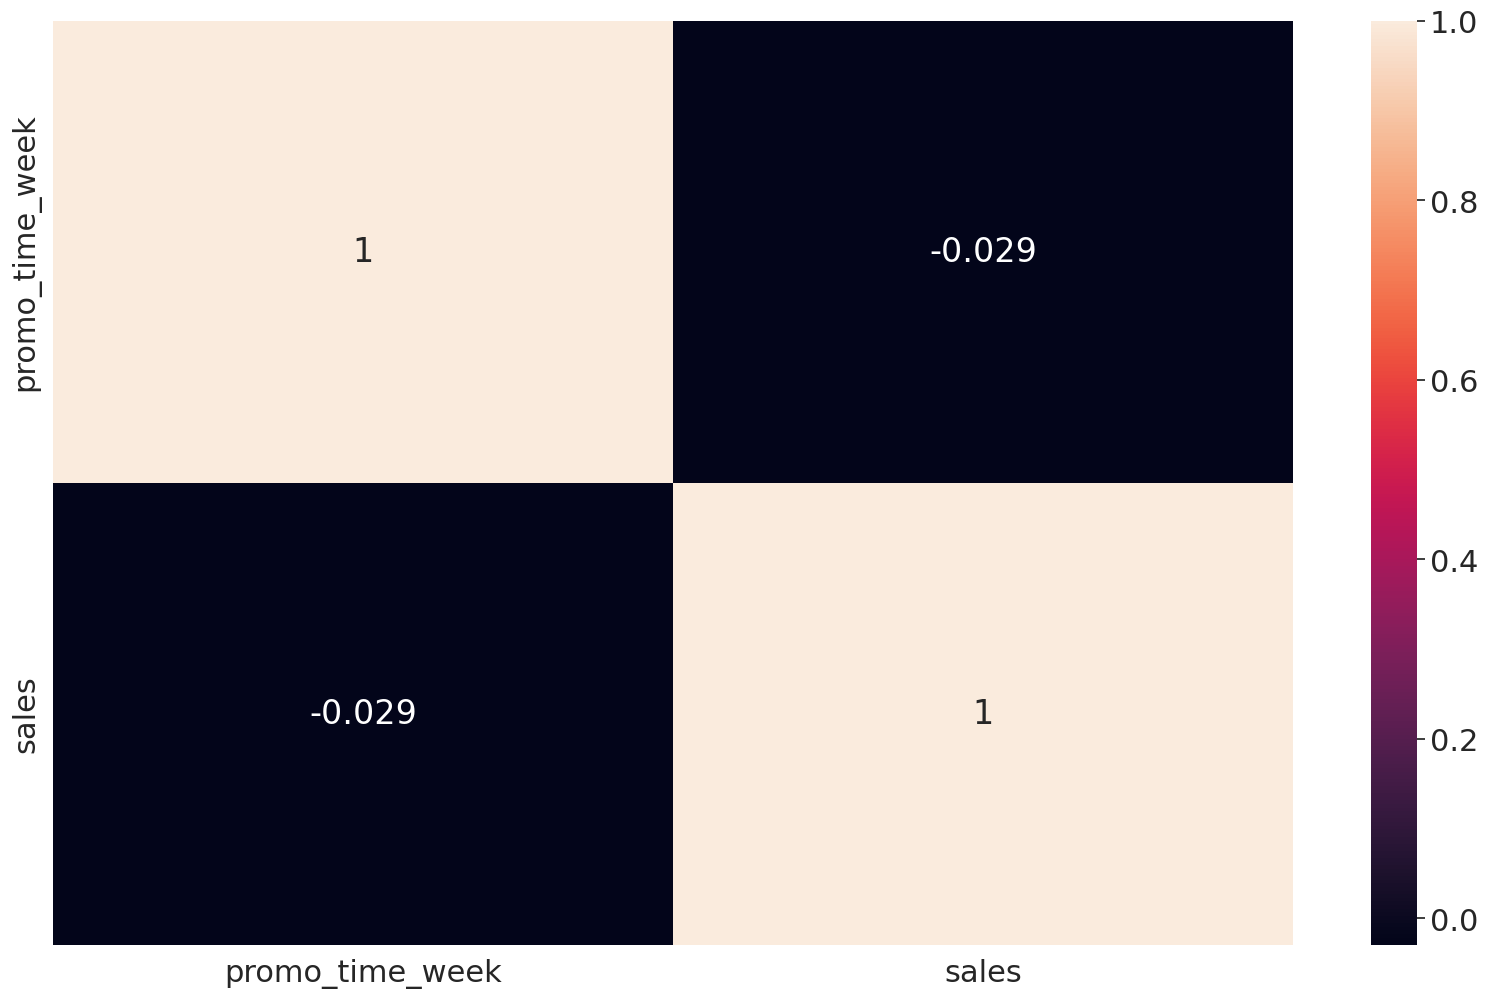

In [216]:

sns.heatmap(aux1.corr(method='pearson'),annot = True);
#correlacao muito baixa talvez por ter tendencia de subido e depois descida
# talvez nem entra no modelo
#só se ela tiver correlação com outras features

## <s/> H5 lojas com mais dias de promoção deveriam vender mais <s/>

In [ ]:
#PROXIMO CRISPO

## H6 lojas com mais promoção concectivas deveriam vender mais 

In [225]:
aux1 = df4.loc[:,['promo','promo2','sales']].groupby(['promo','promo2']).sum().reset_index().sort_values('sales',ascending = False)
aux1

,promo,promo2,sales
2,1,0,1628930532
0,0,0,1482612096
3,1,1,1472275754
1,0,1,1289362241


In [ ]:
    HIPOTESE FALSA POIS LOJAS COM MAIS PROMOÇÃO CONSECTIVAS VENDEM MENOS

In [ ]:
# lojas que participaram só da primeira promoção venderam mais 
# a que n participou de nenhuma tbm vendei mais que a que participou da segunda
#insigt, nao tem vantagem participar da estendida

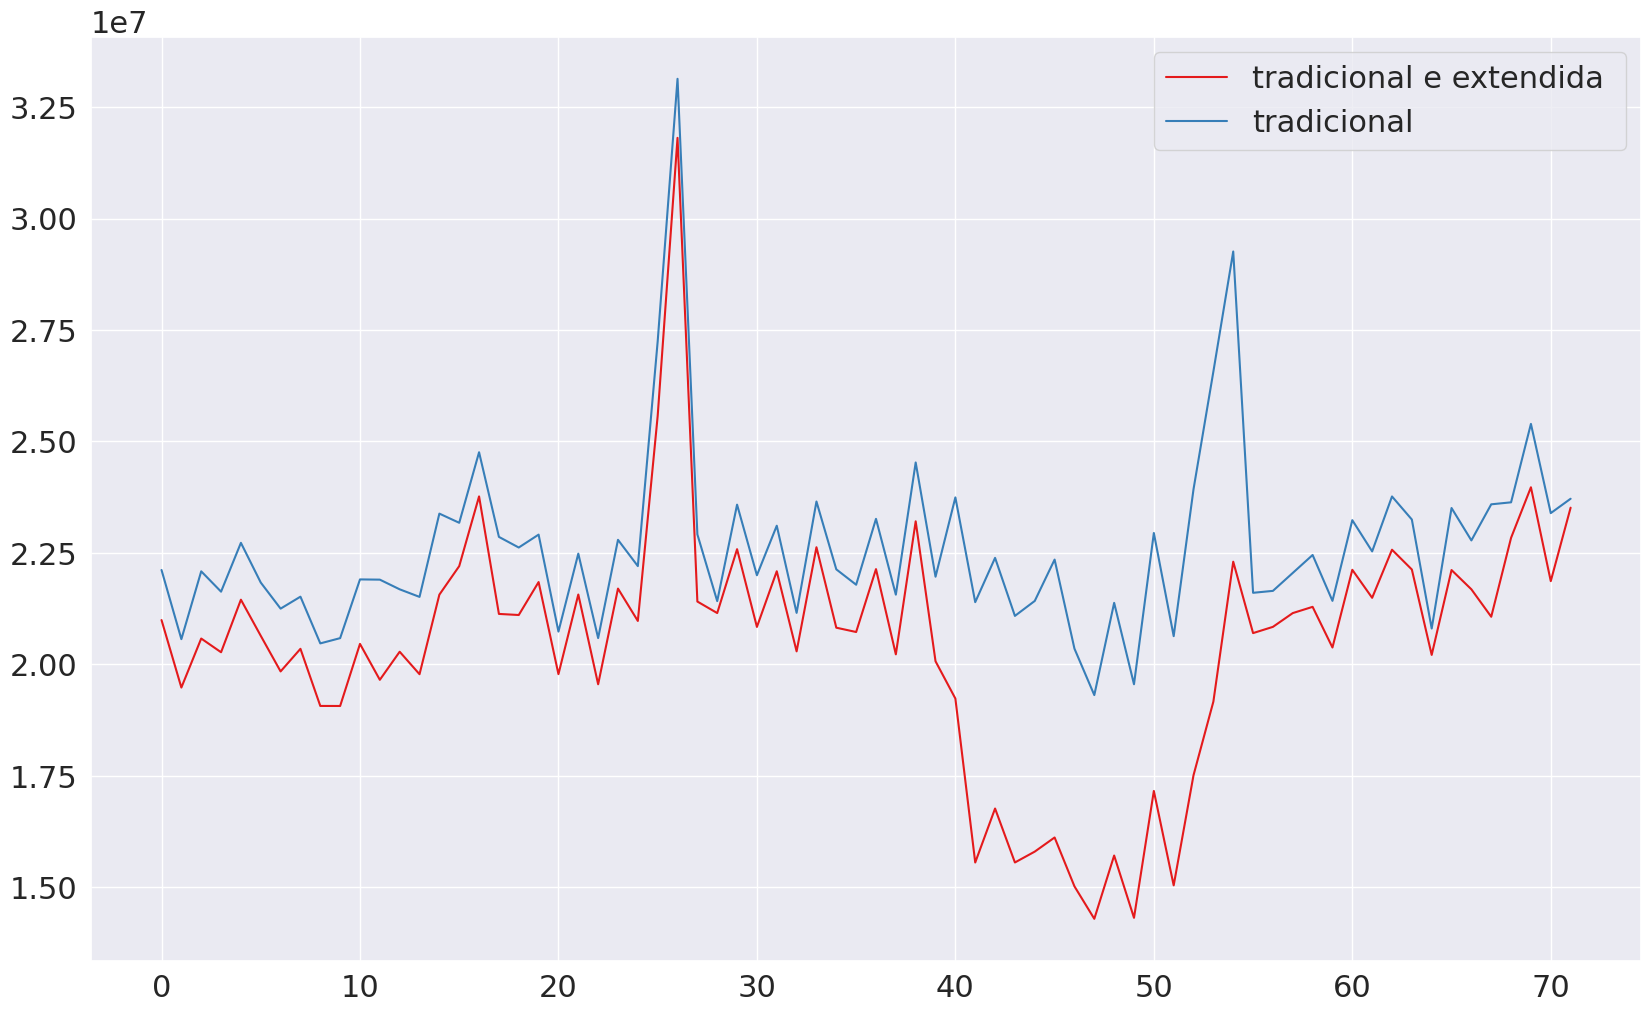

In [230]:
aux1 = df4.loc[(df4['promo']  == 1) & (df4['promo2'] == 1),['year_week','sales']].groupby('year_week').sum().reset_index()
ax = aux1.plot()

aux2 = df4.loc[(df4['promo']  == 1) & (df4['promo2'] == 0),['year_week','sales']].groupby('year_week').sum().reset_index()
aux2.plot(ax=ax)

ax.legend(labels=['tradicional e extendida ','tradicional'])

In [ ]:
#feling é que nao vai ser importante pro modelo até ´q as duas agem de forma semelhante
#quando uma sobe outra sobe etc

## H7 lojas abertas durante feriado de natal deveriam vender mais

In [239]:
aux1 = df4.loc[:,['state_holiday','sales']].groupby('state_holiday').sum().reset_index()
aux1

,state_holiday,sales
0,christmas,691806
1,easter_holiday,1433744
2,public_holiday,5890305
3,regular_day,5865164768


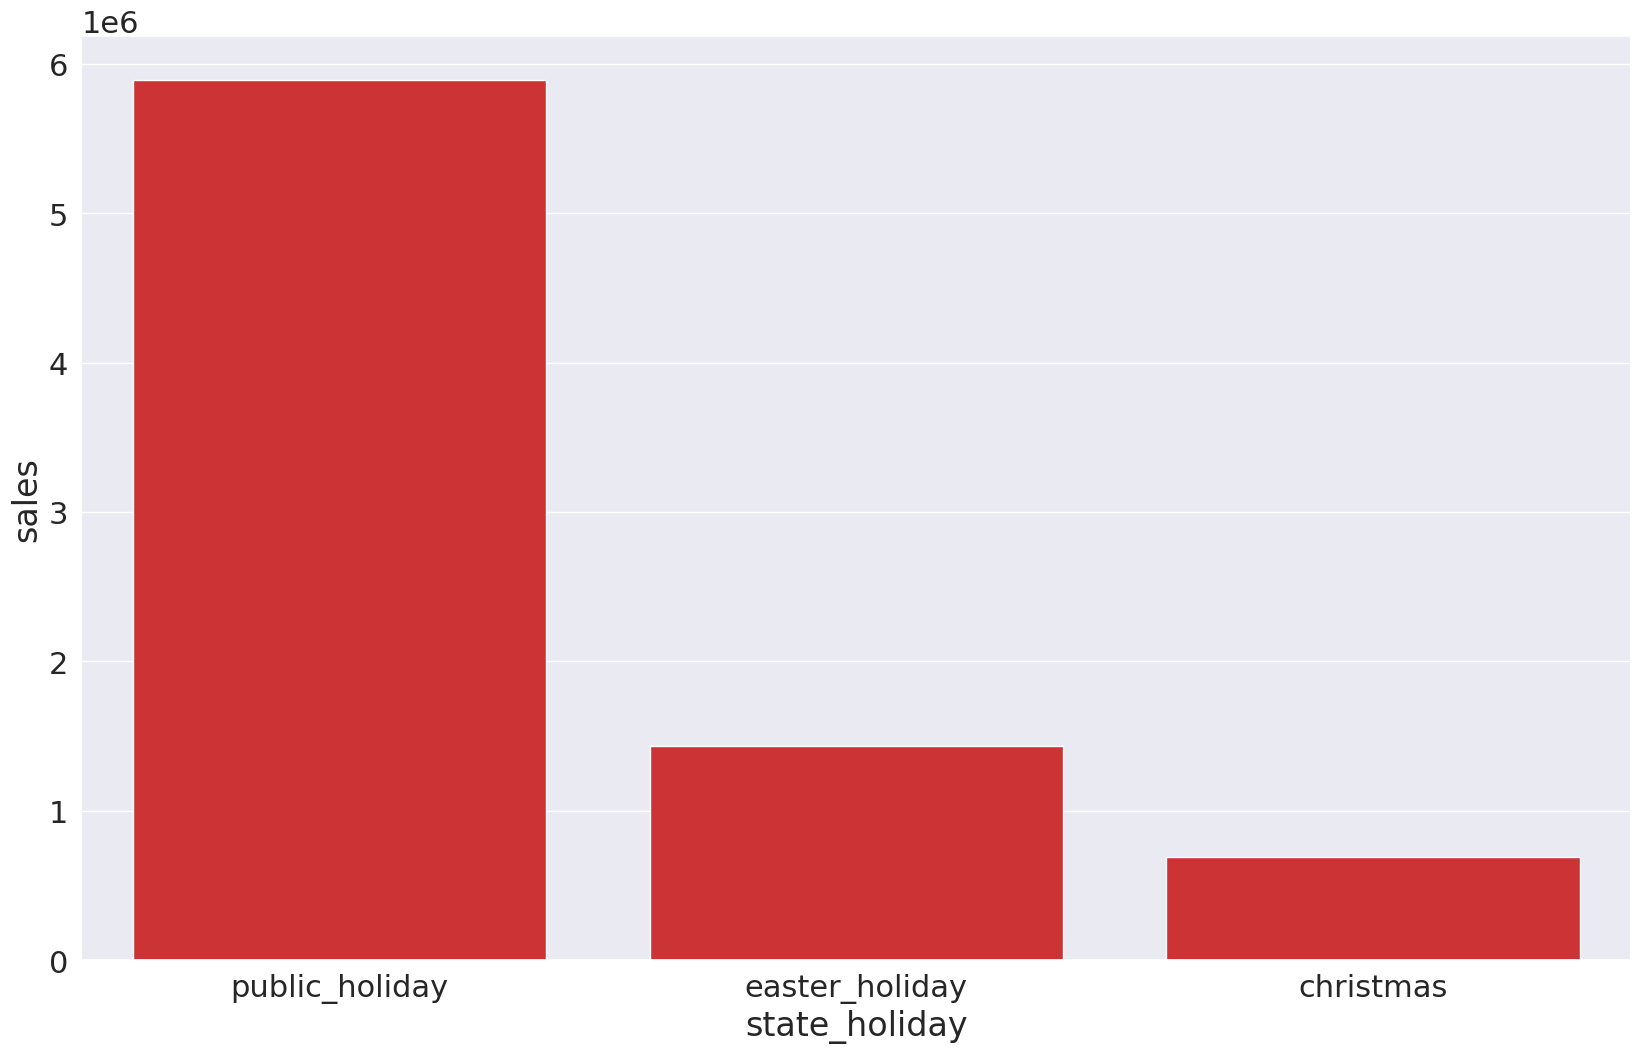

In [262]:
#ax2 = (df4['state_holiday'] == 'regular_day') & (df4['state_holiday'] < 10000000)

aux1 = df4.loc[df4['state_holiday'] != 'regular_day',['sales','state_holiday']].groupby('state_holiday').sum().reset_index().sort_values('sales',ascending=False)
aux1
sns.barplot(x='state_holiday',y='sales',data=aux1);


In [ ]:
HIPÓTESE FALSA lojas durante o feriado naltal vende menos

<Axes: xlabel='year', ylabel='sales'>

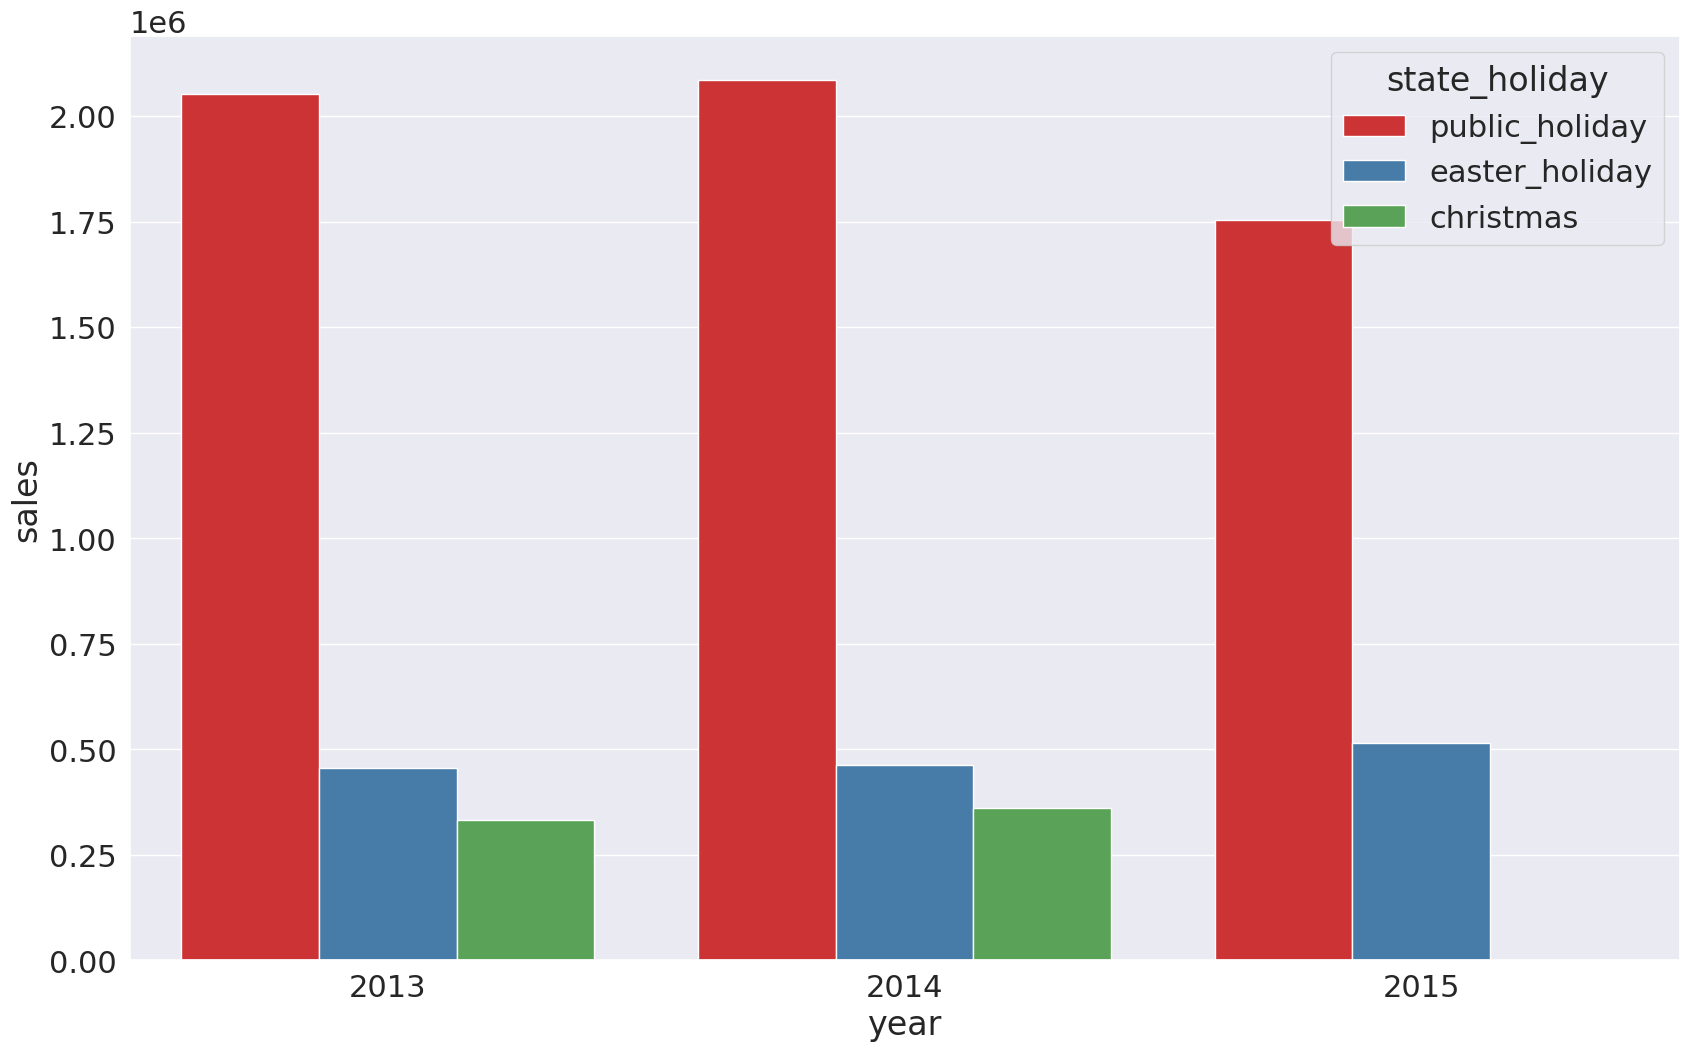

In [269]:
aux2 = df4.loc[df4['state_holiday'] != 'regular_day',['sales','state_holiday','year']].groupby(['year','state_holiday']).sum().reset_index().sort_values('sales',ascending=False)
sns.barplot(x='year',y='sales',hue='state_holiday',data=aux2)

## H8 lojas deveriam vender mais ao longo dos anos

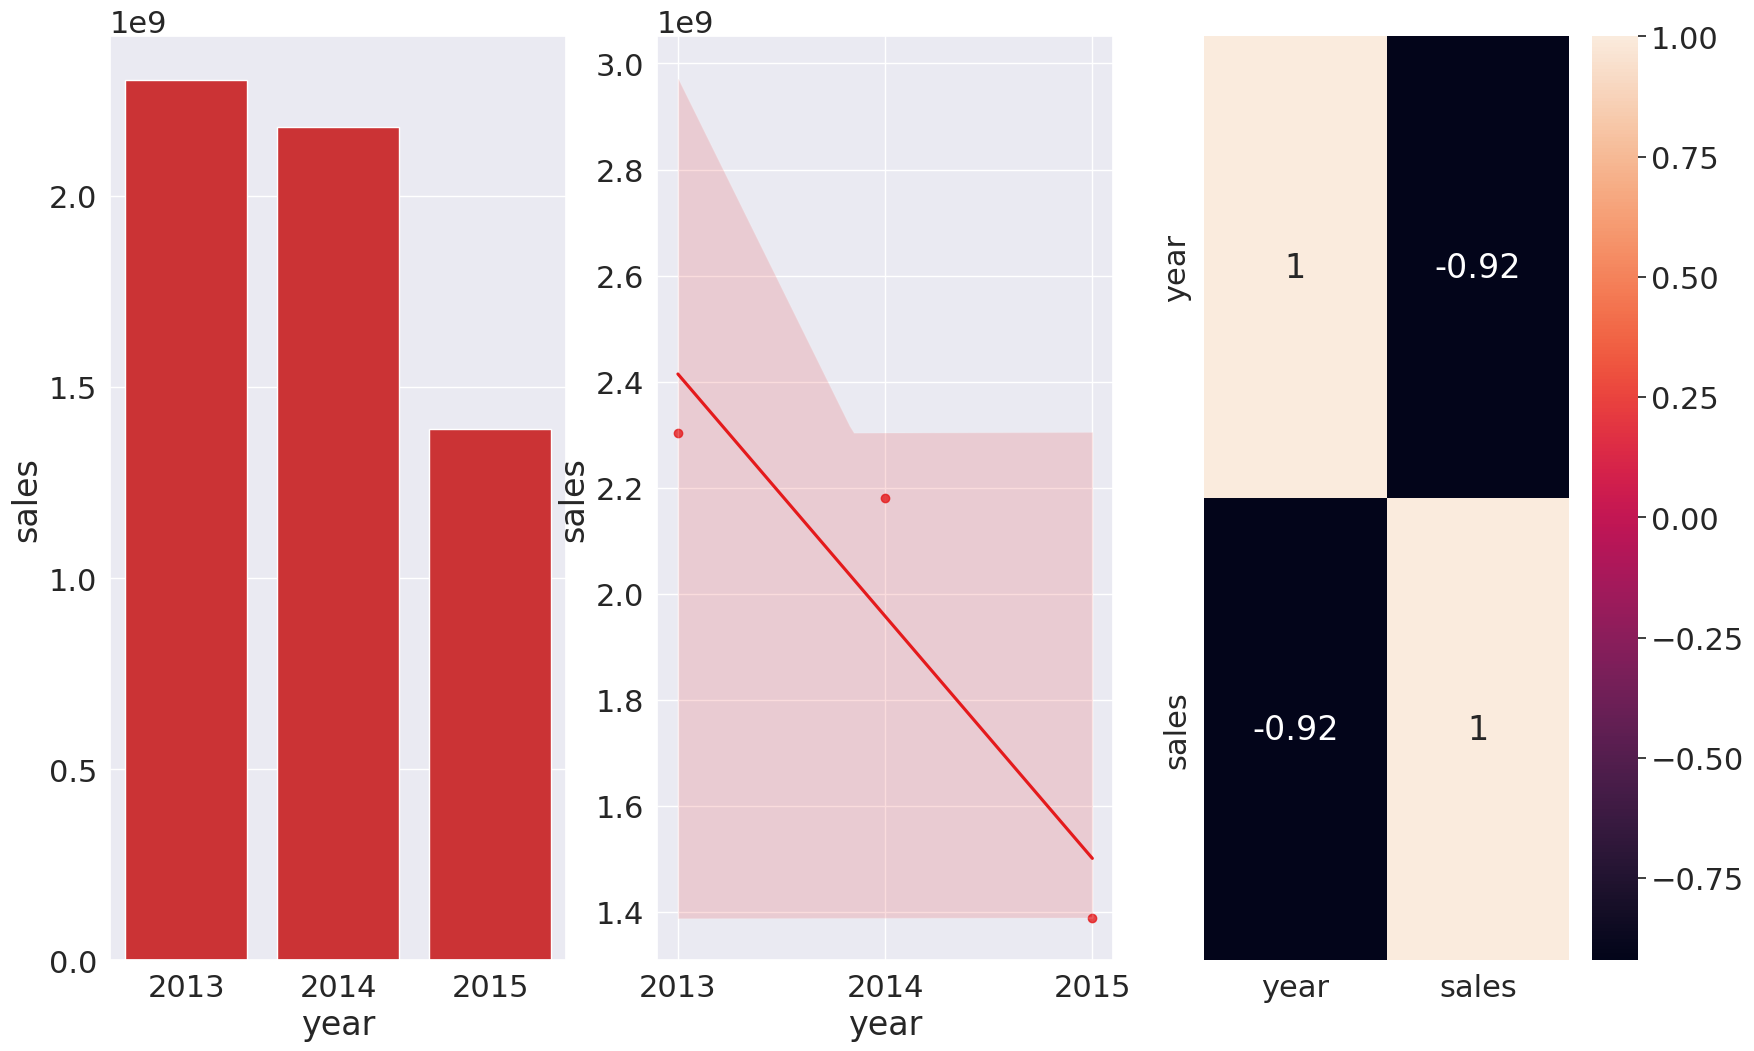

In [279]:
aux1 = df4.loc[:,['year','sales']].groupby('year').sum().reset_index()

plt.subplot(1,3,1)
sns.barplot(x='year',y='sales',data=aux1);

plt.subplot(1,3,2)
sns.regplot(x='year',y='sales',data=aux1);

plt.subplot(1,3,3)
sns.heatmap(aux1.corr(method='pearson'),annot=True);

In [ ]:
#corelação muito negativamente entao quer dizer que conforme os anos mais vai diminuindo as vendas
#mais ta muito forte pq o ano nao acabou e ta levando a média muito para baixo
#vida real pega anos fechado
#isso é indicio de q essa uma variavel importante pro modelo
#nao é insight pq o time de negócio ja deve estar sabendo disso por acompanhar 

In [ ]:
HIPOTESE FALSA POIS AS LOJAS VENDEM MENOS AO LONGO DOS ANOS

## H9 lojas deveriam vender mais no segundo semestre do ano

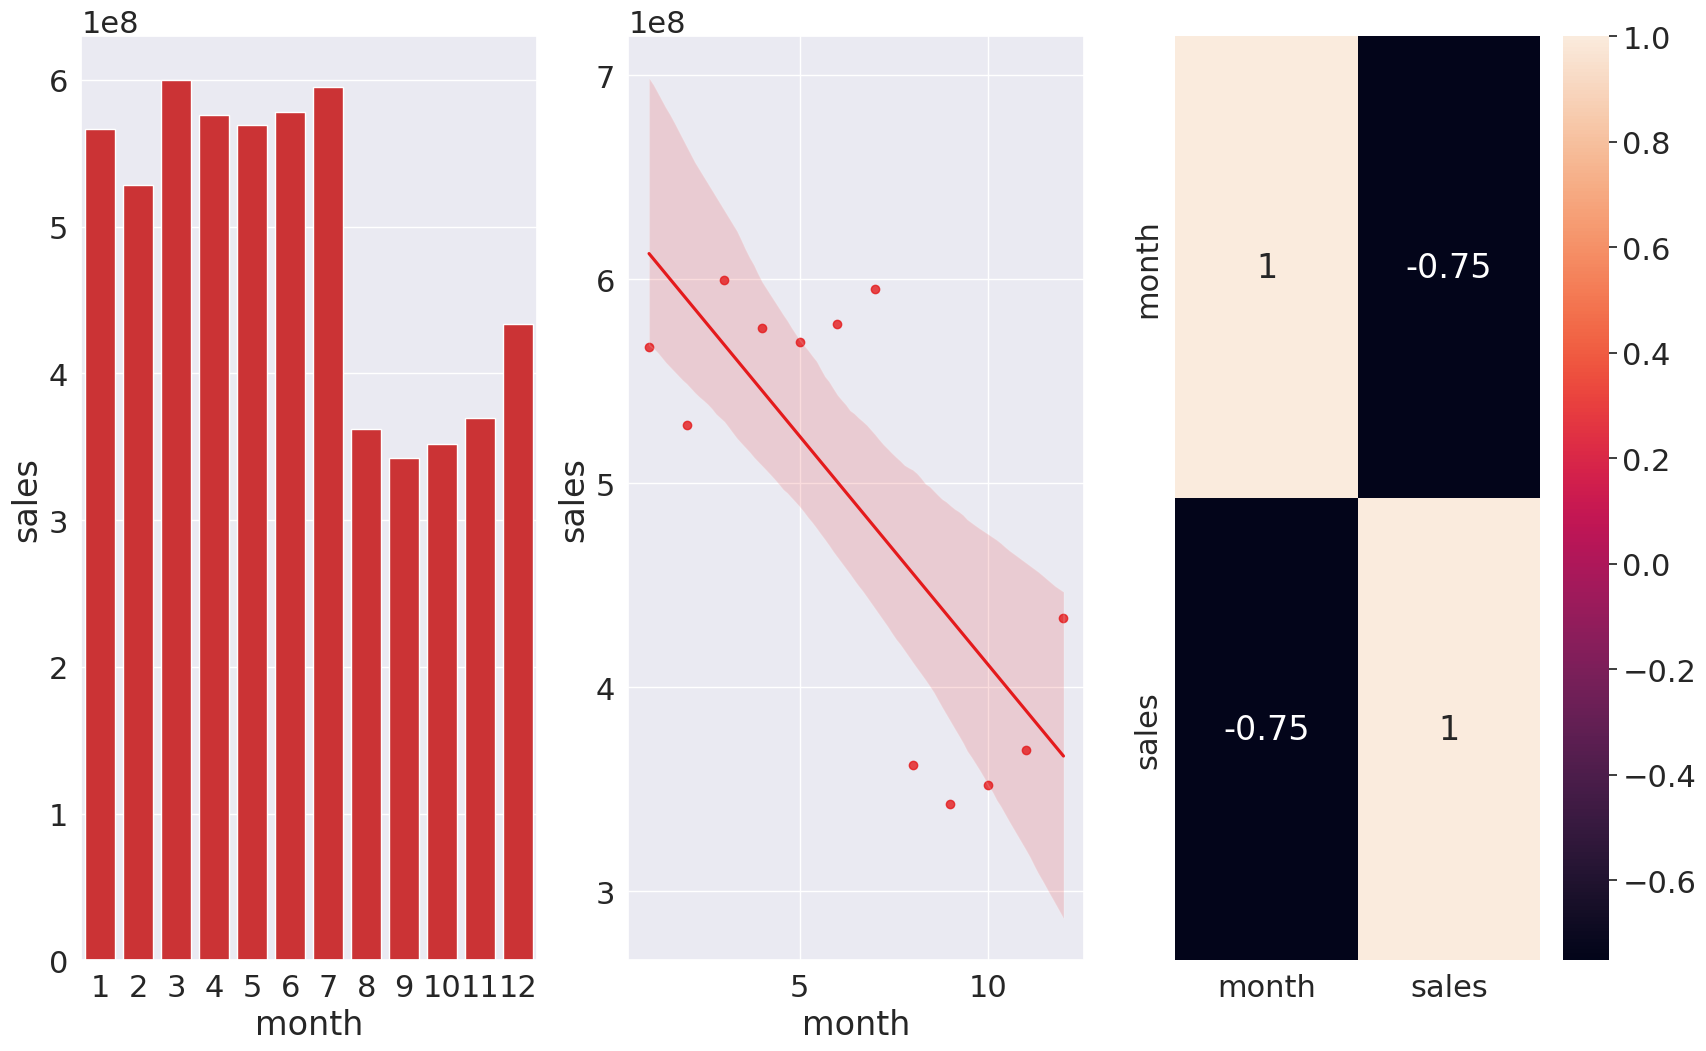

In [280]:
aux1 = df4.loc[:,['month','sales']].groupby('month').sum().reset_index()

plt.subplot(1,3,1)
sns.barplot(x='month',y='sales',data=aux1);

plt.subplot(1,3,2)
sns.regplot(x='month',y='sales',data=aux1);

plt.subplot(1,3,3)
sns.heatmap(aux1.corr(method='pearson'),annot=True);

In [ ]:
# está mostrando que vende menos  no segundo semstre do ano
# essa variavel vai ser importante para o modelo 
#vai mostrar que deve vender menos em certa época

In [ ]:
HIPOTESE FALSA , AS LOJAS VENDEM MENOS NO SEGUNDO SEMESTRE DO ANO

## H10 lojas deveriam vender mais depois do dia 10 de cada mes

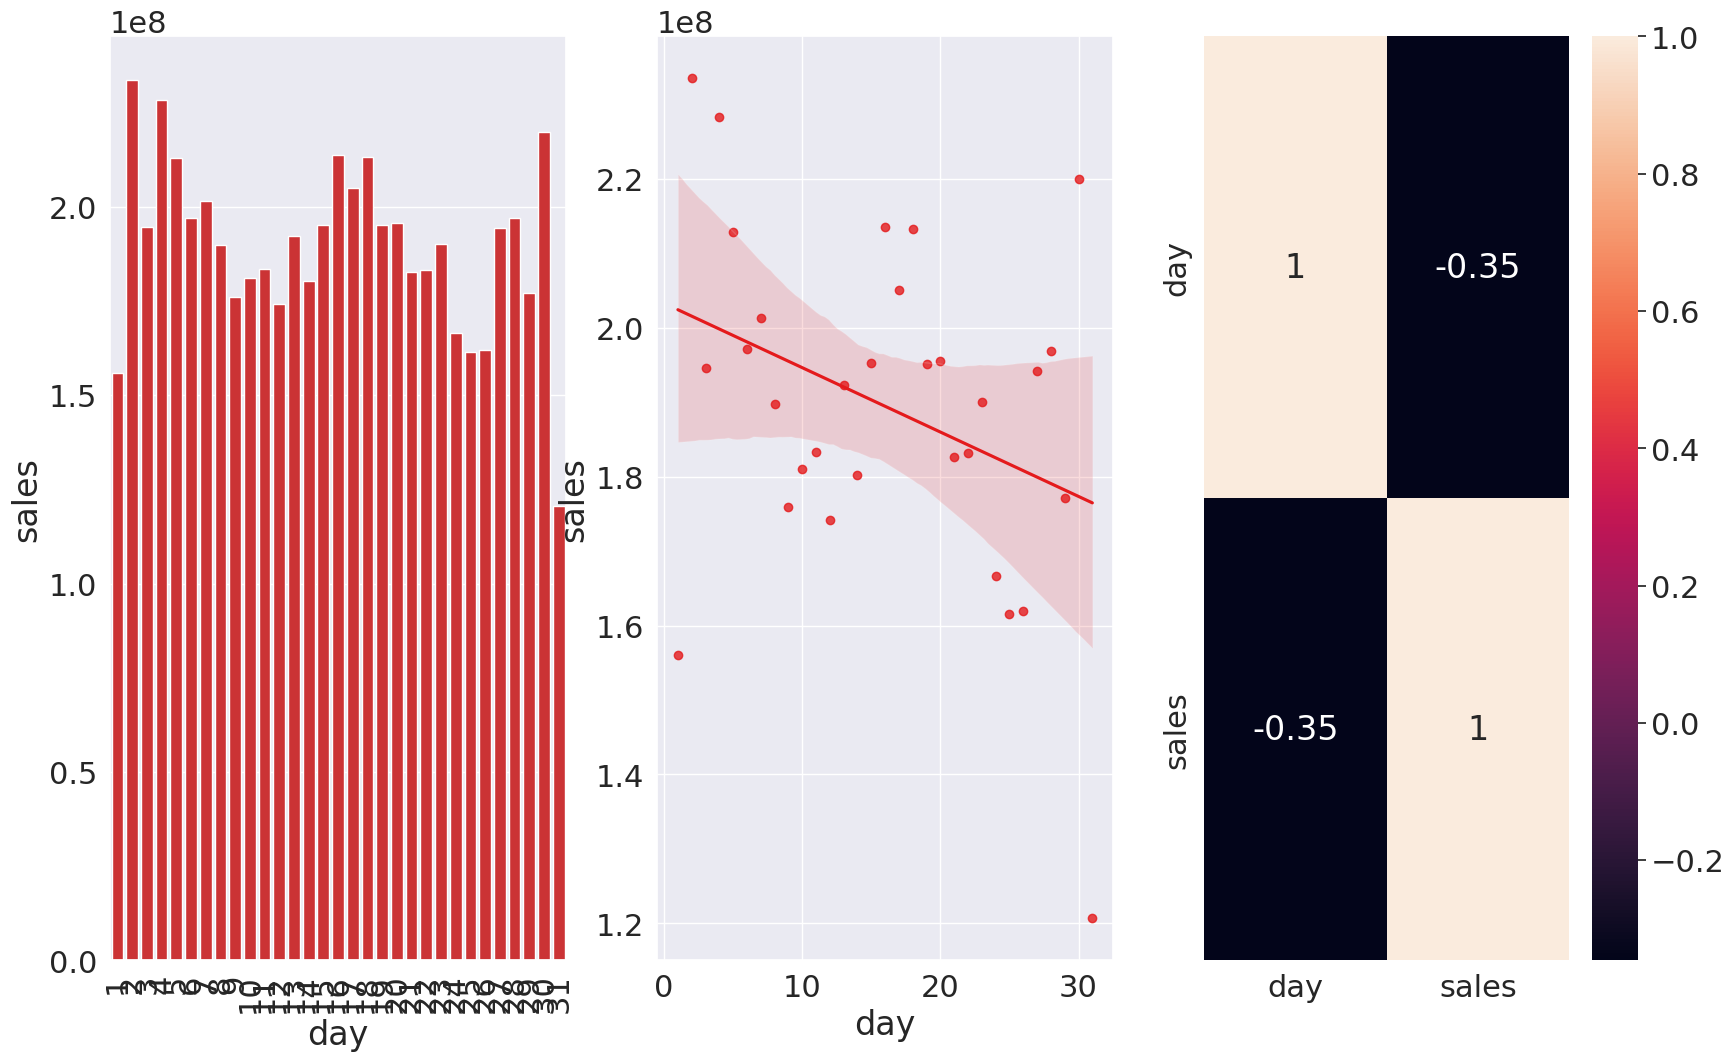

In [283]:
aux1 = df4.loc[:,['day','sales']].groupby('day').sum().reset_index()

plt.subplot(1,3,1)
sns.barplot(x='day',y='sales',data=aux1);
plt.xticks(rotation=90)

plt.subplot(1,3,2)
sns.regplot(x='day',y='sales',data=aux1);

plt.subplot(1,3,3)
sns.heatmap(aux1.corr(method='pearson'),annot=True);

([0, 1], [Text(0, 0, 'after_10'), Text(1, 0, 'before_10')])

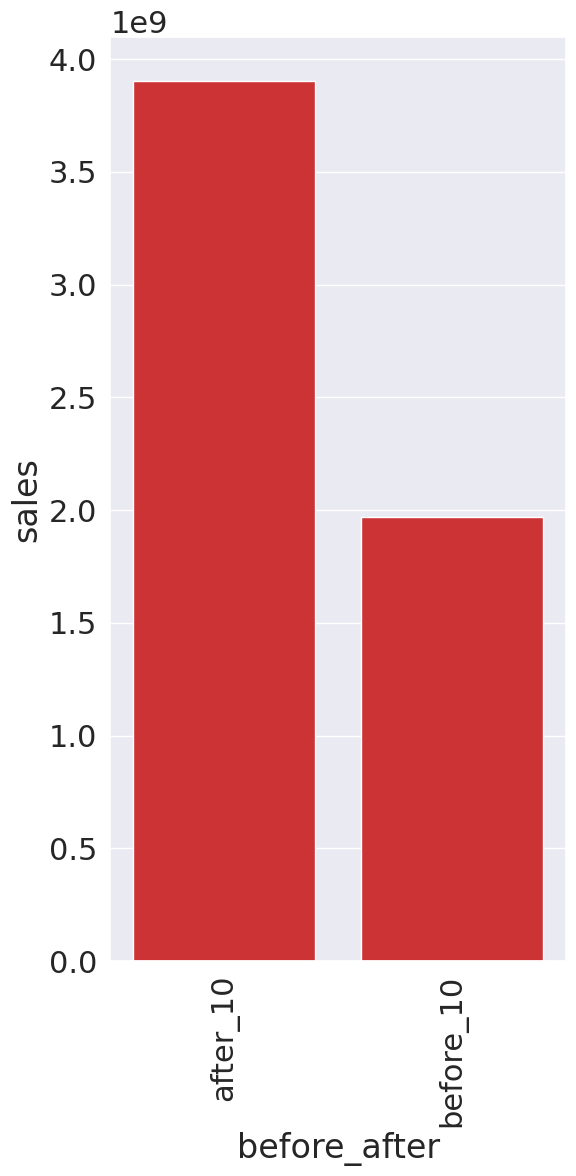

In [314]:
#PLOTAR AGORA COM SEPARAÇÃO ANTES DIA 10 E DEPOIS DIA 10

# Inicialize aux1 com as mesmas linhas que df4
aux1 = df4.loc[:,['day','sales']].groupby('day').sum().reset_index()
# Atribua os valores corretos
aux1['before_after'] = aux1['day'].apply(lambda x : 'after_10'  if x>10  else 'before_10')
aux2 = aux1.loc[:,['before_after','sales']].groupby('before_after').sum().reset_index()

plt.subplot(1,3,1)
sns.barplot(x='before_after',y='sales',data=aux2);
plt.xticks(rotation=90)

#plt.subplot(1,3,2)
#sns.regplot(x='before_after',y='sales',data=aux2);

#plt.subplot(1,3,3)
#sns.heatmap(aux1.corr(method='pearson'),annot=True);



In [ ]:
#vende mais nos começo do mes
#corelação negativa mostrando que vende menos conforme o tempo vai passando 
#essa variavel tbm vai ser importante para o modelo (nao é importante na maioria dos casos as variaveis que nao tem alteração são constantes)


In [ ]:
HIPÓTESE verdadeira , AS LOJAS VENDEM MAIS DEPOIS DO DIA 10 DO MES

## H11 lojas deveriam vender menos aos finais de semana

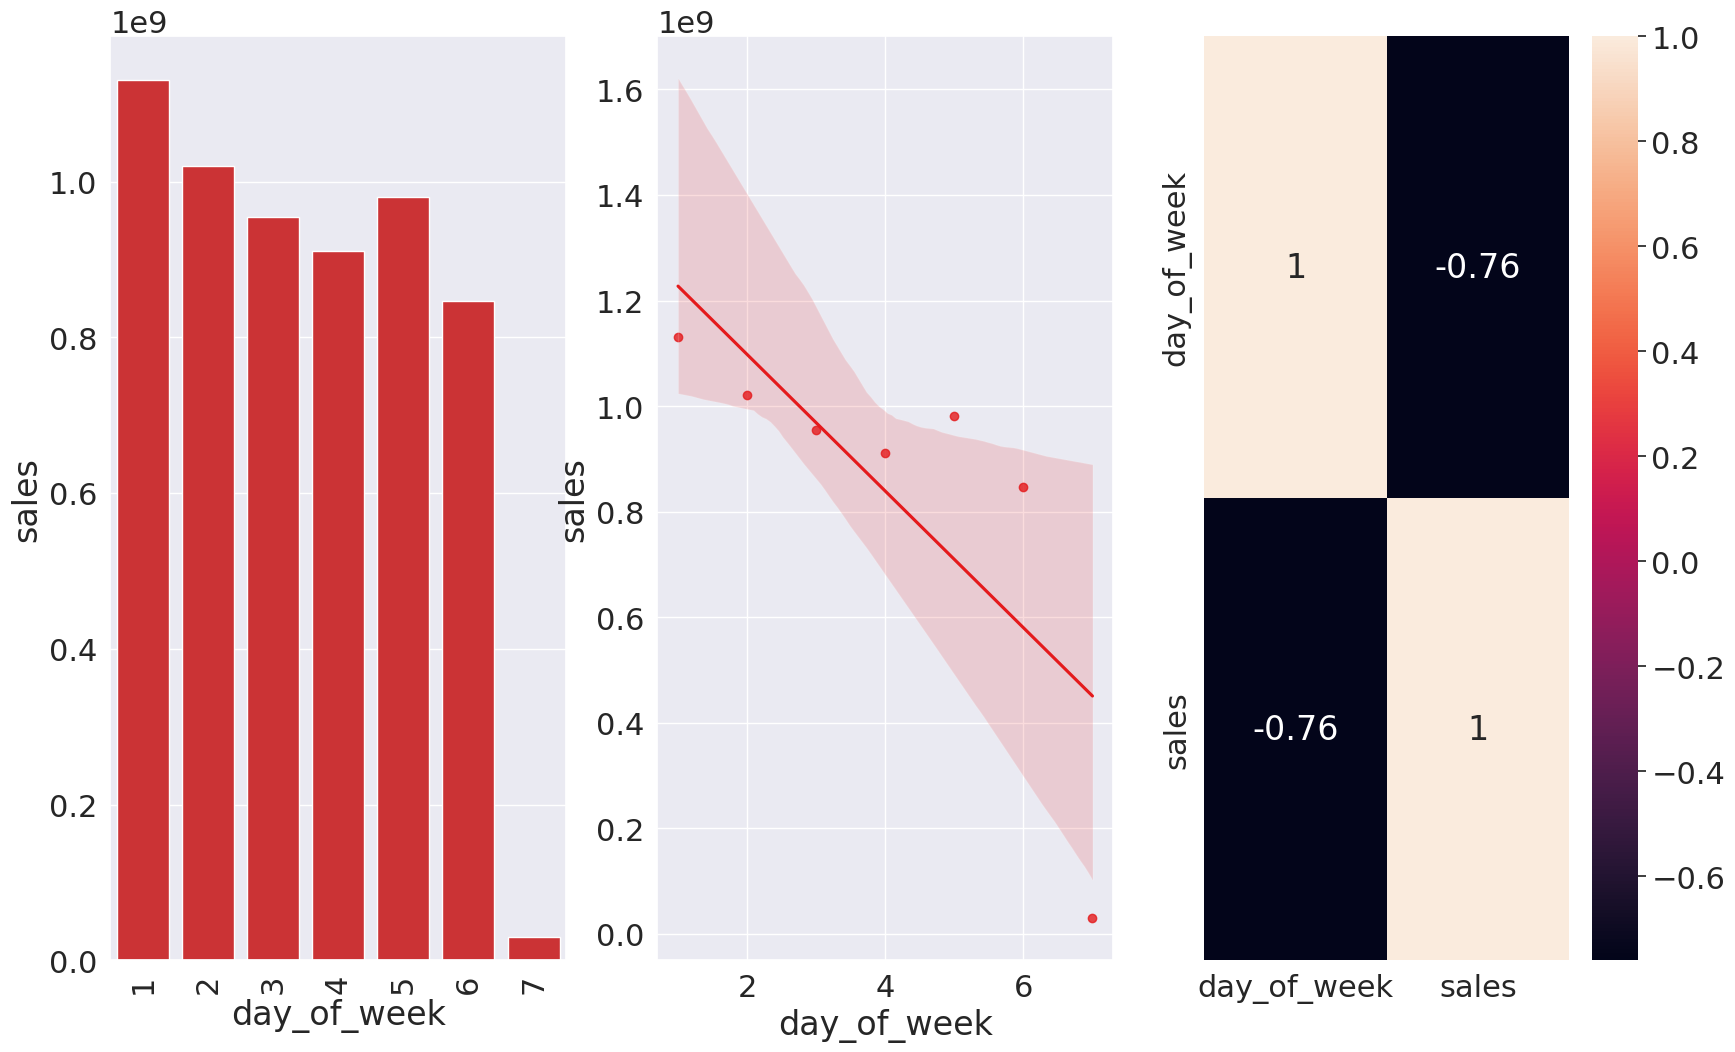

In [316]:
aux1 = df4.loc[:,['day_of_week','sales']].groupby('day_of_week').sum().reset_index()

plt.subplot(1,3,1)
sns.barplot(x='day_of_week',y='sales',data=aux1);
plt.xticks(rotation=90)

plt.subplot(1,3,2)
sns.regplot(x='day_of_week',y='sales',data=aux1);

plt.subplot(1,3,3)
sns.heatmap(aux1.corr(method='pearson'),annot=True);

In [ ]:
#corelação forte negativamente
#talvez possa ser um insight ja que as empresas nao devem saber disso 
#vende menos no final de semana

In [ ]:
HIPOTESE VERDADEIRA, AS EMPRESAS VENDEM MENOS NO FINAL DE SEMANA

## H12 lojas deveriam vender menos durante os feriados escolares

<Axes: xlabel='school_holiday', ylabel='sales'>

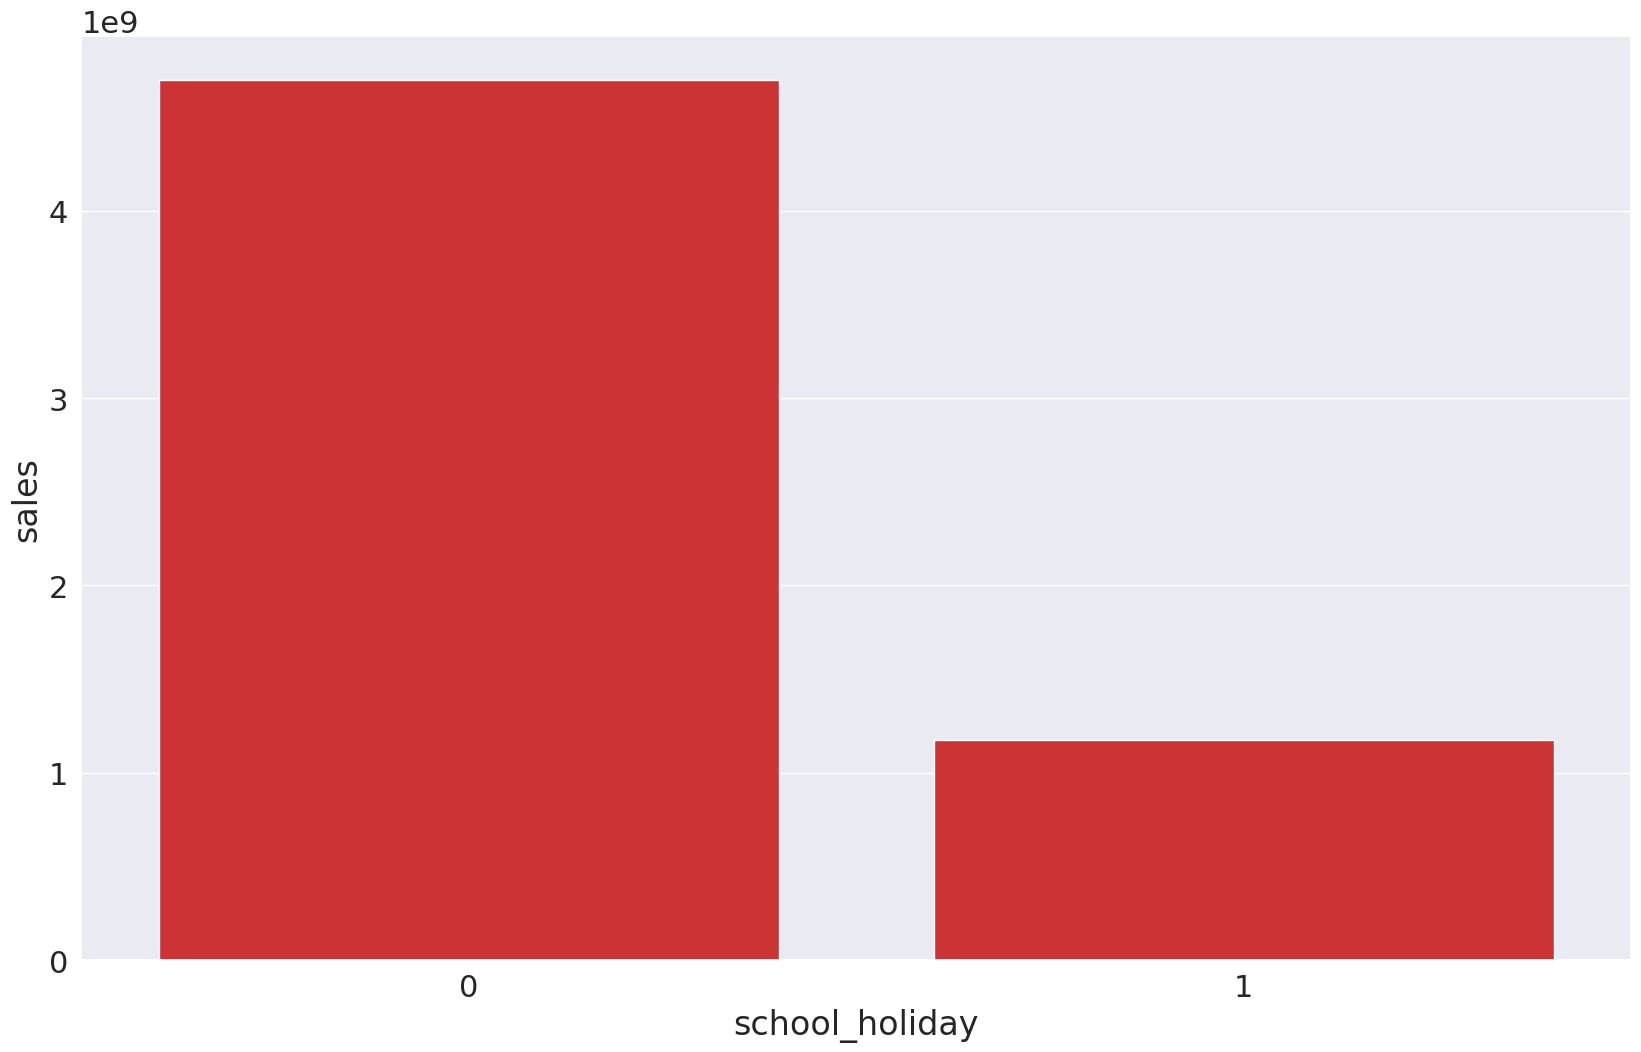

In [329]:
aux1 = df4.loc[:,['school_holiday','sales']].groupby('school_holiday').sum().reset_index()
sns.barplot(x='school_holiday',y='sales',data=aux1)
#vende menos , mas tem menos dias tbm (meio obvio)



In [ ]:
HIPÓTESE VERDADEIRA , AS LOJAS VENDEM MENOS NOS FERIADOS ESCOLATES

MENÇÃO AO MES DE AGOSTO UNICO MES QUE FERIADO ESCOLAR VENDE MAIS QUE IAS REGULARES

<Axes: xlabel='month', ylabel='sales'>

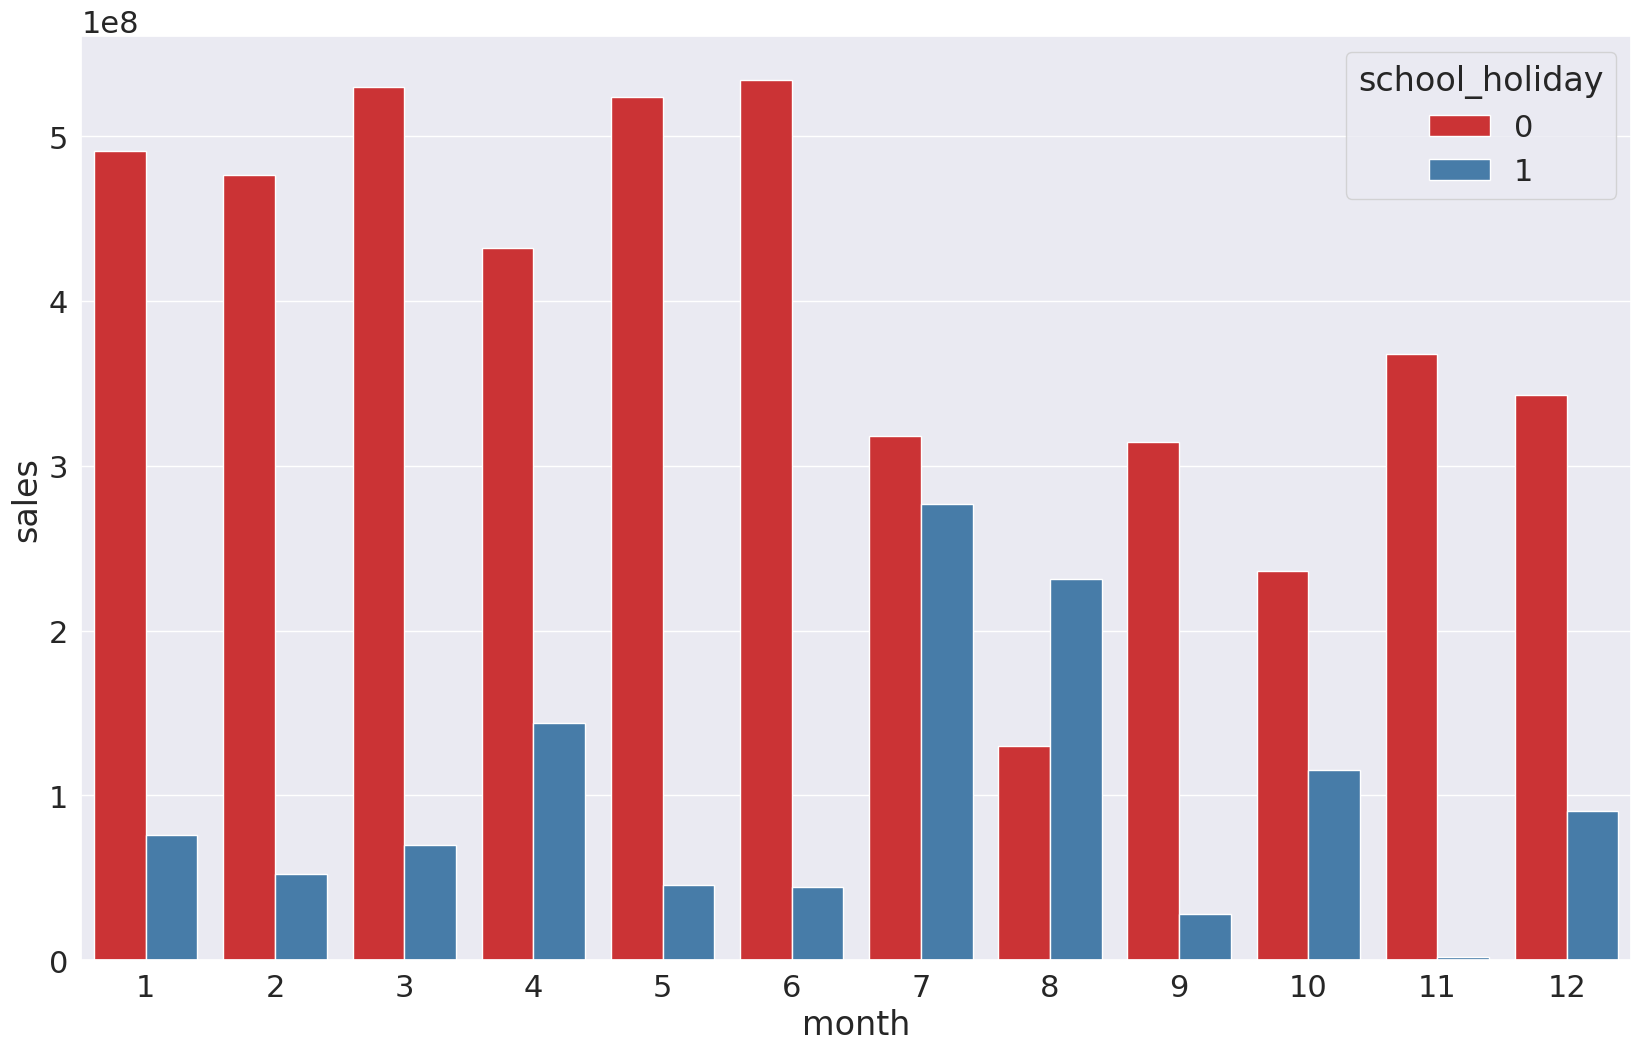

In [330]:
aux2 = df4.loc[:, ['school_holiday', 'sales', 'month']].groupby(['month', 'school_holiday']).sum().reset_index()
sns.barplot(x='month',y='sales',hue='school_holiday',data=aux2)

In [ ]:
# no mes 8 as vendas sao maiores nos feriados escolares
#isso concerteza é insight 
#muito importante essa variavel

<Axes: >

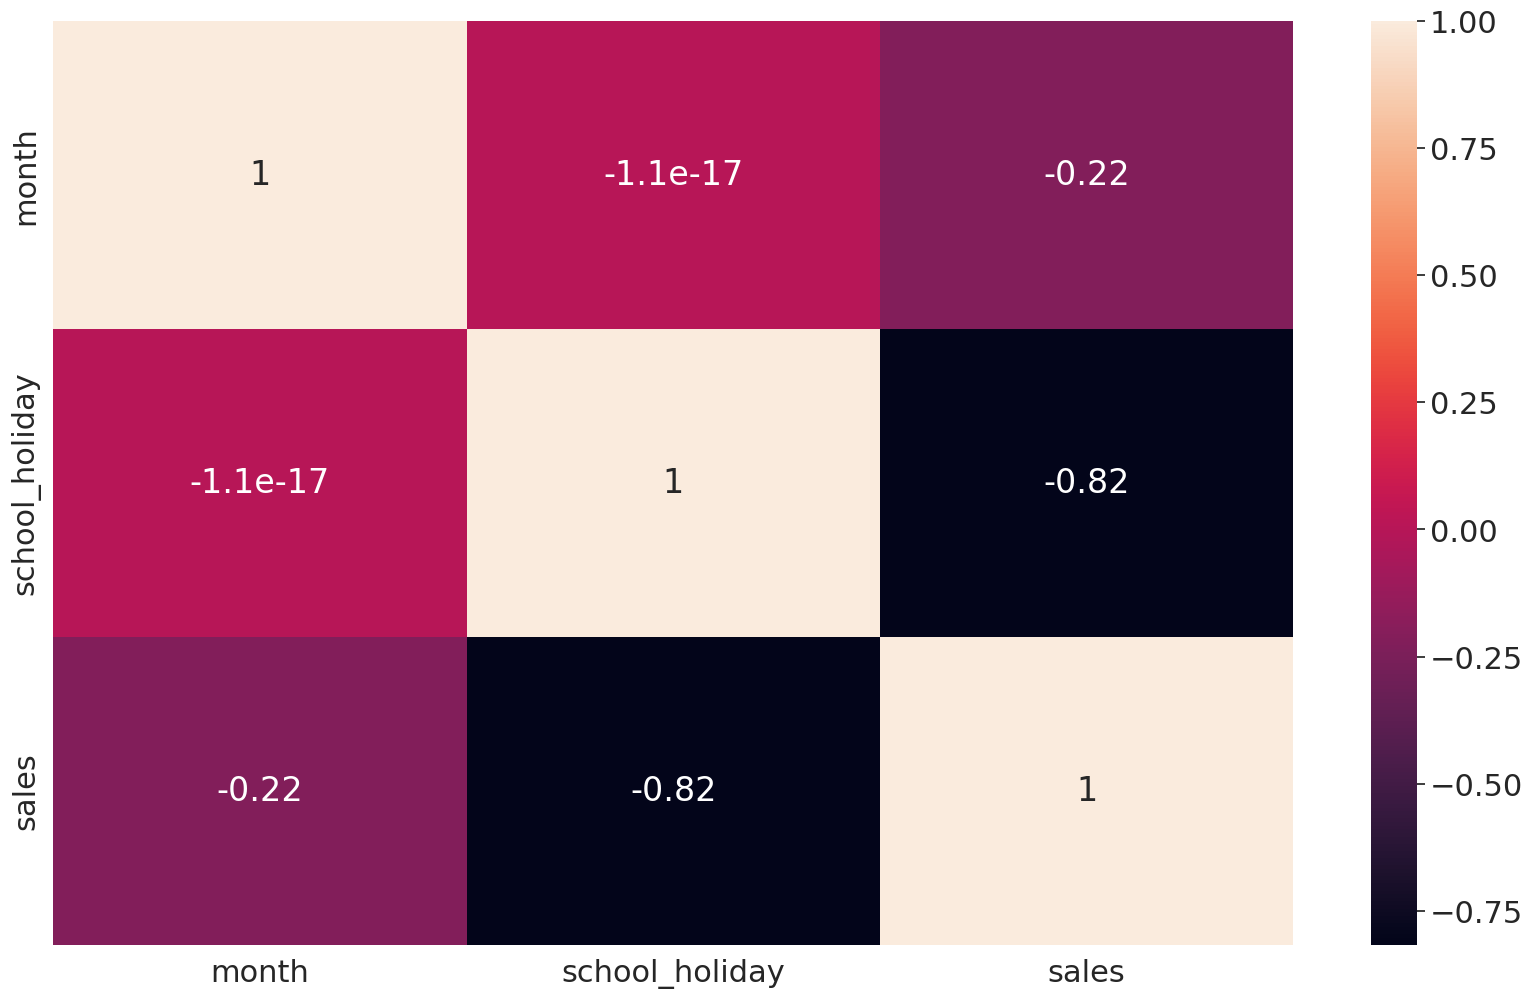

In [335]:
sns.heatmap(aux2.corr(method='pearson'),annot=True)

# analise multivariada